# MLEnd Deception Detection using Machine Learning

*Date: 06/12/24*

# 1. Author

**Name**: Stephanie Keddy   

# 2. Problem formulation

In this project, I aim to build a machine learning model that can predict whether a narrated story is true or not. Specifically, the machine learning model will take a 30 second duration audio recording, and from this, be able to predict whether the recounted story is true or a lie. 

The dataset I am using to build the machine learning model consists of 100 audio samples of varying lengths, some as short as 43 seconds and some as long as over 4 minutes. One recording comprises of a single narrator, and each narrator is unique; in other words, the sample dataset doesn’t contain multiple recordings from the same individual. The recordings also vary in language, with majority spoken in English from a mix of native and non-native speakers. In addition, the narrators vary in gender and age and the recordings were captured in different environments. The language of each recording is provided as a label, but labels for the other varying factors are not.

Lying can be understood as a form of communication, as such, language and culture impact the way people lie (Dando CJ, 2023); moreover, linguistic differences can also be observed between gender (Pei, 2021). In this way, we would expect to see variance in vocal cues linked to language, cultural background and gender. As well, variations in environment will also impact audio quality. Together, these variations create a highly complex information set for determining patterns of truth and patterns of deception.

Accordingly, not only does our dataset comprise all of these complexities, but is also relatively small in size; thus making this project particularly interesting. Whilst language labels have been provided, it has been decided not to use this information to support machine learning as the dataset is very imbalanced with some languages having only a handful of samples. As such, the challenge of this project is to create a machine learning model that takes an audio input with no other information to guide (such as language, culture, gender) that can still predict truthfulness or deception in a narrated story, despite significant variance in verbal delivery and sound. 

# 3. Methodology
 
This project has used a sample of 100 audio recordings from the MLEnd deception dataset, evenly split between 50 deceptive stories and 50 truthful stories, and labelled accordingly. The dataset was then subsequently divided into a Train set (80%) and final Test set (20%), maintaining the 50-50 balance of truthful and deceptive stories in the subsets so that they are representative of each other for model training and final evaluation purposes. That is to say, if they were unbalanced, it would result in the Train and Test sets having contrasting majorities, which could negatively impact the model’s ability to effectively generalise due to developing bias towards the Train set’s majority class. The 80 audio clips in the Train set will be divided again into subsets of Training (80%) and Validation (20%); this secondary split will happen in the step below after preprocessing for efficiency in the model training and evaluation stage. 

To process the training set for model training and evaluation, the audio samples are cut into 30 second clips. To ensure an accurate snapshot of the full audio recording is captured it has been decided that three 30 second clips will be taken, comprising of the beginning 30s, middle 30s, and last 30s. In this way, we aim to capture potential nuances of truthfulness or deception that might occur at different stages of the story narration, whilst retaining a 30s input parameter. After this, various features will be extracted. 

Feature extraction has been approached by grouping like features together as well as grouping all features together. In this way, the following datasets have been created: 1) pitch related features, 2) MFCC features, 3) Rhythm and tempo features and 4) combination of all these features. Principal component analysis has also been performed on each of these dataset, reducing each dataset to two dimensions so we can visually assess if a distinct relationship between ‘true’ and ‘deceptive’ story labels exists. To also help guide dataset selection for model training and evaluation, the calculations of proximity cost functions were used as conceptual framework for computing Bayesian posterior probabilities. In particular, the inter-cluster scatter between truth labelled samples and false labelled samples was calculated to evaluate separation, and the inter-cluster scatter for truth and false labels was also calculated to evaluate compactness. Given datasets with well-defined clusters tend to result in clearer class distinction and lead to higher posterior probabilities for correct classification when applying Bayesian inference, this approach helps prioritise the datasets that are perhaps more likely to enhance the model’s classification accuracy. Accordingly, the inter- and intra- ‘cluster’ scatter was calculated for each dataset using all features, as well as on the reduced dimension version from performing PCA, and two datasets were selected to take forward for model training and evaluation. In this way, we have two versions of the Train dataset, each with different feature sets. 

As mentioned above, it is at this stage the two versions of the Train set are now split into subsets of training and validation. Steps are taken to ensure all three 30s clips from each narrator are kept together within either the training set or validation set, not spread across both, to avoid data leakage during model evaluation. It was also decided to maintain an even balanced dataset of truthful and deceptive stories for training and validation in line with the same reasoning outlined above.

For model training and evaluation, four different machine learning models have been used with a structured training approach. The first two models, SVM (Support Vector Machine) and Random Forest, are trained with stratified K-fold cross validation (CV) to ensure balanced representation of each class occurs within each fold. This is followed by hyperparameter tuning using GridSearchCV. For the SVM model, the ensemble technique of Bagging has also been used to help reduce variance and improve robustness. The third model is a CatBoost classifier, which leverages its own internal CV and GridSearch capabilities for hyperparameter fine-tuning. Lastly, a voting classifier is created, using the three individual models with their respective ‘best’ determined hyperparameters. The VotingClassifier uses stratified K-fold CV and GridSearchCV for further optimisation to determin voting strategy. The model mix has been designed to ensure diversity in learning approach to reflect the diversity within the dataset itself, and with the aim to capture a richer array of the nuances between true and deceptive stories to enhance predictive performance. 

For comparing performance between models, a classification report is produced, providing precision, recall, F1 score and overall accuracy. As the validation dataset is very small, bootstrapping (resampling with replacement) has been used to create different iterations of the validation dataset. ‘Accuracy’ has been selected as the principal metric of model evaluation, creating a distribution of all the accuracy scores, and then determining confidence intervals (CIs) for interpreting model performance. In this way, if the range of values for a particular CI doesn’t include 0.5 and is greater than 0.5, it is interpreted as the confidence that the model will perform better than random chance. Equally, if the model consistently performs worse than 0.5 (i.e. worse than random guessing), we can still exploit the systematic pattern of errors by flipping the predictions to achieve a better-than-chance performance; accordingly, CIs can then be determined and interpreted in such cases as well. Accuracy was chosen as the metric as the training and validation sets are evenly balanced, as well, it provides a single statistic for plotting performance of the bootstrapped iterations. By comparing the CIs of the different models and corresponding bootstrapped validation distributions of accuracy, a model can be selected for creating a deployable pipeline. 

Once the deployable pipeline is created, the selected model will be retrained on the combined training and validation sets, and then finally tested on the final test set. 


# 4. Implemented ML prediction pipelines

This section describes the machine learning prediction pipeline used to classify audio clips as either truthful or deceptive. The pipeline is structured into three main stages: Transformation, Model Training and Evaluation, and Ensemble Techniques. Each stage processes the dataset through specific steps to prepare and extract features, train predictive models, and evaluate their performance. A topline overview of this pipeline can be understood as follows:

**Input data:** Train set (list of audio file paths and dataframe of corresponding classification labels)

**1. Transformation**
* Data loading and preprocessing (audio clips split into three 30-second segments [beginning, middle, end] from original recordings)
* Feature extraction & dataset creation (e.g., pitch, MFCCs, tempogram features, power)
* Exploratory data analysis
* Feature set selection based on EDA
* Splitting selected feature datasets into Training and Validation sets

**Transformation output / input for Model building:** 2x feature sets of X_train (2D array of predictor features) and y_train (1D array of target labels) for training, and X_val (2D array of predictor features) and y_val (1D array of target labels) for evaluation of the model's predictions on unseen data.

*[Below pipeline stages are now in two streams, one for each feature dataset]*

**2. Model building**
* SVM with Bagging *(Initialise & train model, and evaluate performance, incl. bootstrapping validation)*
* Random Forest *(Initialise & train model, and evaluate performance, incl. bootstrapping validation)*
* CatBoost *(Initialise & train model, and evaluate performance, incl. bootstrapping validation)*

**Model building output / input for model ensemble:** Fine tuned hyperparameters for each model

**3. Ensemble approach**
* Voting Ensemble *(Initialise & train model, using SVM, Random Forest and CatBoost as base models with pre-tuned hyperparameters. Evaluate performance, incl. bootstrapping validation)*

**Ensemble building output:** Trained models for final evaluation and selection for building deployable pipeline

## 4.1. Transformation stage

The transformation stage involves preprocessing the raw audio clips from the Train dataset to extract relevant features. This includes the following steps:

* **Loading and Preprocessing:**
  - Taking a .wav file path as input, librosa library is then used to load an audio clip as a raw audio data array (i.e. an array of samples) and obtain the sampling frequency (i.e. the number of samples per second).
  - Using this information, three segments of samples representing 30s in duration (beginning, middle and end) are extracted as individual arrays, as well as extracting corresponding label class and filename each segment was taken from (used as group ID for keeping same narrator audio clips together in data splitting).
  - To account for differing durations of audio inputs, the middle and end are calculated from the total duration (total length of data array / sampling frequency); for recordings shorter than 1min30s, segments will overlap.
  - Three outputs are generated: 1) a list of 240 raw audio arrays (i.e. 3 for each audio file in Test set), a 1-dimensional array of 240 labels encoded as boolean values where True = true story, and False = deceptive story, and a 1-dimensional array of file names.  
* **Feature Extraction & Dataset Creation:**
  - The raw audio array is used as input to extract various audio features, including power, pitch, MFCCs (Mel-Frequency Cepstral Coefficients), and Tempogram features.
  - For features that are extracted at a frame level, summary statistics are generated, such as mean and standard deviation.
  - A feature matrix is returned for each audio file. All audio feature matrices are then returned as a single numpy array.
  - Dataset is created for each feature set grouping.
  - Additionally, a dataset is constructed that includes all extracted features
* **Exploratory Data Analysis:**
  - Performing dimensionality reduction on extracted features using PCA, reducing features to two components to help understand underlying structure of the dataset and identify patterns or relationships between features.
  -  Calculating the inter- and intra- 'cluster' scatter of Truth and Deceptive class labels for each dataset using all features, as well as on the reduced dimension version from PCA, to help guide data selection for model experimentation.
* **Feature Set Selection Based on EDA:**
  - Compare insights from EDA and select two most promising feature datasets for model experimentation
* **Dataset Splitting:**
  - For efficiency in model experimentation, the two selected feature datasets (created from the same Train set files) are then both split into Training (80%) and Validation (20%) datasets.
  - A 50-50 label balance is maintained in the Training and Validation datasets.
  - The file name ID is used to keep same narrator recordings grouped together in either Training or Validation set, not spread across both.

Thus, as a final output from the transformation stage, there are now two sets of:
- 'X_train', a 2-dimensional array of predictor features for training.
- 'y_train', a 1-dimensional array of target labels for training.
- 'X_val', a 2-dimensional array of predictor features unseen by the fine-tuned model for generating predictions.
- 'y_val', a 1-dimensional array of target labels for evaluating the predictions from the unseen data passed through the fine-tuned model.

## 4.2. Model stage

Here is a description of the different ML models used and rationale for choosing them:

**Model 1: SVM (Support Vector Machine) with Bagging**

* **Description:**
  - A pipeline is defined to first scale the data using StandardScaler before passing it to the SVM classifier.
  - The BaggingClassifier then wraps this pipeline so that for each bootstrap iteration, it samples a subset of the training data, copies the pipeline, and applies the scaling and SVM model training. After all iterations are completed, the classifier then aggregates predictions from the multiple pipelines.
  - GridSearchCv has been applied to optimise hyperparameters for the entire bagging ensemble. That is to say, for every combination of SVM and bagging hyperparameters (as defined in the parameter grid), a new ensemble is trained.
  - Stratified K-fold cross validation has also been used, splitting the training data into training and valdiation subsets within the model training process as well. Please note, this does not involve using the validation set defined in the transformation stage.
  - Each bagging ensemble with a specific combination of hyperparameters is trained on the training fold and evaluated on the validation fold.
  - GridSearchCV also serves to aggregate all the validation scores across all folds for each hyperparameter combo, identifying which configuration performs best.
  - Once cross-validation is complete and the best combination of SVM and bagging hyperparameters are determined, the model is retrained on the full training set using this 'best' configuration. 
* **Rationale:**
  - SVM was chosen as it is a powerful classification algorithm that's well suited for complex datasets with high dimensionality. As SVMs can be sensitive to outliers and high variance, Bagging has also been used to help reduce variance by aggregating predictions from multiple iterations of SVM classifiers. In this way, it helps improve the overall stability of the model and it's ability to generalise. Given the small size of the training set and the complex nature of the data, it was determined that SVM with Bagging could be an effective choice for predicting deception or truth from a 30second clip.

     
**Model 2: Random Forest**

* **Description:**
  - The Random Forest Classifier is defined as the base model. This combines multiple decision trees, which are each trained on a random subset of the training data to help reduce overftting and improve the model's ability to generalise.
  - GridSearchCV is used to evaluate different combinations of hyperparameters (as defined in the paramater grid) to find the particular configuration combo that performs the best for the Random Forest Model.
  - Stratified K-Fold cross validation is also applied, splitting the training set into training and validation sets ensuring class proportions are preserved. Within each fold, the Random Forest is trained and evaluated on every combination of hyperparameters.
  - Once cross-validation is complete and the best combination of hyperparameters are determined, the model is retrained on the full training set using this 'best' configuration. 
* **Rationale:**
  - Random Forest was chosen as it can be particularly effective for helping to identify which features are more or less important as it measures the impact of each feature on the prediction. In this way, it is an effective model for understanding complex relationships between features within a dataset. Moreover, a random forest combines predictions from multiple trees to help reduce variance and increase robustness. For these reasons, Random Forest was selected for model experimentation. 

**Model 3: CatBoost**
* **Description:**
  - The CatBoost Classifier is defined as the base model.
  - As CatBoost requires data as a 'Pool' object, predictors and labels are joined together for training and validation sets, creating a training pool and valdiation pool. This is done to optimise internal handling of datasets.
  - CatBoost's internal grid search functionality is used to test combinations of hyperparameters as defined in the parameter grid.
  - CatBoost's inbuilt stratified cross validation is leveraged. Each combination of hyperparameter is tested and evaluated within each fold.
  - Once all folds are completed, the average performance metric identifies the best hyperparamter combination for the model.
* **Rationale:**
  - CatBoost is a gradient boosting algorithm that is especially efficient at handling categorical data. It employs ordered boosting to minimise overfiting, thereby enhancing the model's ability to generalise. In contrast to the bagging techniques in Model 1 and Model 2, CatBoost provides and alternate method for enhancing the training process by sequentially building models, each trying to correct the errors of the previous one. Along with CatBoost's native abilities for handling categorical data, this model has been chosen to increase the diversity of the model mix. 

## 4.3. Ensemble stage

**Model 4: Voting Ensemble**
* **Description:**
  - This voting model aims to combine all of the individual strengths of the three classification models chosen above (SVM, Random Forest and CatBoost) into a single robust classifer. In this approach, each of the base models (SVM, Random Forest and Catboost) will be re-trained independently, and their predictions will be combined through a voting mechanism to make the final classification decision. The fine-tuned parameters from Model 1, Model 2, and Model 3 will be used as the parameters for the base models, respectively. In this way, whilst the base models are un-trained, they will be pre-tuned, leveraging the optimisation learnings from Model 1, Model 2 and Model 3. 
  - GridSearchCV is used to evaluate which voting strategy (e.g. hard or soft) performs the best for the voting model.
  - Stratified K-Fold cross validation is also applied, splitting the training set into training and validation sets ensuring class proportions are preserved. Within each fold, base models are trained on the training subset, then the predictions will be combined according to the voting mechanism for training and evaluation; this is done for each voting strategy.
  - Once cross-validation is complete and the best voting strategy is determined, the model is retrained on the full training set using this 'best' strategy. 
* **Rationale:**
  - SVM, Random Forest and CatBoost employ differing and effective approaches for classification learning, thus, a voting ensemble can capitalise on their complimentary strengths, leading to an overall more robust model. In this way, this ensemble approach can improve performance by leveraging the diverse strengths of each model to classify truth or deception more accurately. 

# 5. Dataset

The datasets have been created from the MLEnd Deception Dataset to train and evaluate the ML pipeline. As part of the exploratory data analysis, four datasets have been created each focusing on different audio features, grouped to highlight variations in sound characteristics. Training and validation splits were created to ensure independence and balance while keeping all samples from the same narrator in the same set to avoid data leakage during model evaluation. A more in-depth explanation on how this has been done can be found in section 5.6.

Here is a summary of the datasets and variants:

* Dataset A: Features include power, pitch, and voice flag.
* Dataset B: Features include MFCCs and power.
* Dataset C: Features include tempogram features and power.
* Dataset D: Combination of all features (A, B, and C).

As part of the exploratory analysis for guiding dataset selection, principal component analysis (PCA) has been performed on each of the datasets reducing the various dimensions to two components. With two components, this means we can more easily visualise if distinctiveness exists between truthful and deceptive stories based on the reduced dimension feature set with a scatter plot. In addition, the inter-cluster scatter between truth labelled samples and false labelled samples was calculated to evaluate separation, and the inter-cluster scatter for truth and false labels was also calculated to evaluate compactness. Given datasets with well-defined clusters tend to result in clearer class distinction and lead to higher posterior probabilities for correct classification when applying Bayesian inference, this approach helps prioritise the datasets that are perhaps more likely to enhance the model’s classification accuracy. 

**Limitations** 

At this stage, it is important to note limitations in the chosen approach. In this project, it has been decided to keep balanced datasets for training and evaluation, however this might not reflect the reality of the wider population dataset. That is to say, if deception is more prevalent in the population, then the final model is unlikely to perform as well as it has been trained in a balanced environment. During the model experiment stage later on, bootstrapping validation has been used to help simulate real-world variance, as bootstrap variations aren't stratified due to resampling. That being said, the resampling pool is still a balanced dataset, so whilst extremes of unbalance are possible, they are less unlikely. 

In addition, whilst the dataset is balanced between truth and deception, it is not balanced between language mix. As a result, if the population dataset is vastly different in language composition, this will also adversely impact model performance. 

## 5.1. Data Loading & Audio Pre-Processing 

Firstly, a sample of 100 audio files are downloaded from the MLEnd deception dataset. To ensure a balanced split, all files are downloaded into a the Train_Set, then stratified splitting into a Train Set and Test Set occurs subsequently.

In [1]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import librosa
import IPython.display as ipd
from tqdm import tqdm
import mlend
from mlend import download_deception_small, deception_small_load

datadir = download_deception_small(save_to='MLEnd', subset={}, verbose=1, overwrite=False)

Train_Set, TestSet, MAPs = deception_small_load(datadir_main=datadir, train_test_split=None, verbose=1, encode_labels=True)

100%|▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓|100\100|00100.wav
Done!
Total 100 found in MLEnd\deception/MLEndDD_stories_small/


In [2]:
#stratified train-test splitting 
Y_encoded = np.array(Train_Set['Y_encoded'])
train_indices, test_indices = train_test_split(np.arange(len(Y_encoded)), test_size=0.2, stratify=Y_encoded, random_state=24)

TrainSet = {key: (np.array([Train_Set[key][i] for i in train_indices]) if key in ['Y', 'Y_encoded'] else [Train_Set[key][i] for i in train_indices])for key in Train_Set}
TestSet = {key: (np.array([Train_Set[key][i] for i in test_indices]) if key in ['Y', 'Y_encoded'] else [Train_Set[key][i] for i in test_indices])for key in Train_Set}

In [3]:
path = 'MLEnd\\deception\\MLEndDD_story_attributes_small.csv'
MLEND_df = pd.read_csv(path).set_index('filename')

In [4]:
trainfiles = TrainSet["X_paths"]
sample_path =  "MLEnd\\deception\\MLEndDD_stories_small/"
files = [f"{sample_path}\\{name}" for name in trainfiles]

To process the training set for model training and evaluation, the audio samples are cut into three 30 second clips: extracting the first 30s, middle 30s and last 30s. For recordings that are less than 1min30s, this means the recording clips will overlap. In this way, we aim to capture potential nuances of truthfulness or deception that might occur at different stages of the story narration, whilst retaining a 30s input parameter. Functions have been created to process the audio data in this way below.

In [5]:
def shorten_clip(audio, fs, start_time=0, duration=30):
    start_sample = int(start_time * fs)
    end_sample = int(start_sample + duration * fs)
    return audio[start_sample:end_sample]

In [6]:
def preprocess_clips(files, labels_file):
    X, y, file_names = [], [], []
    for file in tqdm(files):
        fileID = file.split('\\')[-1] #get file name from path to reference in MLEND_df
        yi = labels_file.loc[fileID]['Story_type'] == 'true_story' #if story is true, then true, otherwise label as false (i.e. deceptive)
        fs = None
        audio, fs = librosa.load(file, sr=fs) #load audio as raw data array and get sampling frequency

        total_duration = len(audio) / fs #calculate audio clip duration by dividing length of raw audio data array by sampling frequency (i.e. how many samples per second)
        start_times = [0, total_duration / 2 - 15, total_duration - 30] #get begining start, middle start and last 30s start

        for start_time in start_times:
            clip = shorten_clip(audio, fs, start_time=start_time, duration=30) #call helper function above to get segment of samples that correspond to 30s after inputted start time
            X.append(clip) #append array of samples to list
            y.append(yi) #add label for clip segment to list
            file_names.append(fileID) #add filename ID of clip segment to list
    
    return X, np.array(y), fs, np.array(file_names)

In [8]:
audio, y, fs, file_names = preprocess_clips(files, MLEND_df)

100%|██████████████████████████████████████████████████████████████████████████████████| 80/80 [00:03<00:00, 20.45it/s]


Having processed the Train set audio files, there are now 240 audio samples with corresponding class labels and file name IDs. The 30s audio samples can be listened to below.

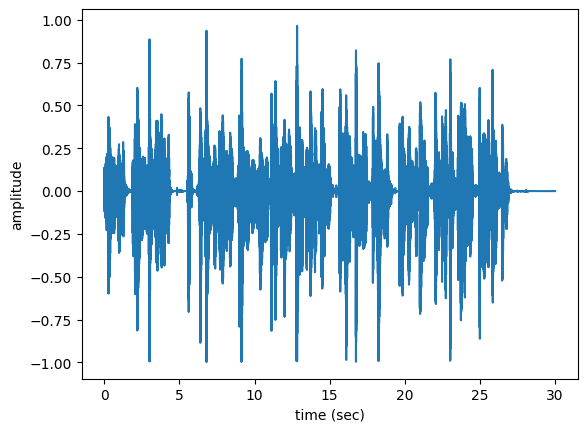

In [9]:
x = audio[2]
t = np.arange(len(x))/fs
plt.plot(t,x)
plt.xlabel('time (sec)')
plt.ylabel('amplitude')
plt.show()
display(ipd.Audio(data=x, rate=fs))

## 5.1. Dataset A: Power, Pitch and Voice Flag

These features have been extracted together to describe the dataset by variation in sound level from both a pitch perspective and overall energy in each clip. A helper function for extracting pitch features has been created, taking an audio array as input, sampling frequency and frame length. This helper function is called on in the get_X_pitch function, which loops through each audio ‘array’ (i.e. processed file), calculates power (i.e. overall energy of sample), mean and standard deviation of pitch values for each frame, and mean of voice flag (proportion of frames that a voice was detected in).

In [10]:
def extract_pitch_feats(x,fs,winLen=0.02):
  #winLen = 0.02
  p = winLen*fs #num of samples based on window length
  frame_length = int(2**int(p-1).bit_length()) #get frame length (segments of the audio data)
  hop_length = frame_length//2 #set frame length overlap
  f0, voiced_flag, voiced_probs = librosa.pyin(y=x, fmin=80, fmax=450, sr=fs, frame_length=frame_length,hop_length=hop_length) #extract fundamental frequency, voiced/unvoiced flag and voiced probs for each frame
  return f0,voiced_flag

In [11]:
def get_X_pitch(audio, scale_audio=False):
    X = []
    for x in tqdm(audio):
        if scale_audio: x = x/np.max(np.abs(x)) #standardise amplitude of audio signals
        f0, voiced_flag = extract_pitch_feats(x,fs,winLen=0.02) #call extract pitch helper function
        power = np.sum(x**2)/len(x) #calc energy of the audio signal
        pitch_mean = np.nanmean(f0) if np.mean(np.isnan(f0))<1 else 0 #get the pitch (f0) mean of all frames for each audio clips
        pitch_std  = np.nanstd(f0) if np.mean(np.isnan(f0))<1 else 0 #get the pitch (f0) std of all frames for each audio clips
        voiced_fr = np.mean(voiced_flag) #proportion of frames voiced across audio clip
        xi = [power,pitch_mean,pitch_std,voiced_fr] #return 4 values for each clip
        X.append(xi)
    return np.array(X) #return X list of arrays to one numpy array for further processing

In [12]:
Xpitch = get_X_pitch(audio,scale_audio=True)

100%|████████████████████████████████████████████████████████████████████████████████| 240/240 [14:51<00:00,  3.72s/it]


In [13]:
columns = ['power', 'pitch_mean', 'pitch_std','voiced_fr']
pitch_df = pd.DataFrame(Xpitch, columns=columns) #create dataframe of pitch feature set

## 5.2. Dataset B: Mel-Frequency Cepstral Coefficients (MFCC) and Power

MFCC can be understood as compact representations of an audio sample’s power spectrum, which mimics a human’s perception of frequencies. In this way, this dataset captures relative perception of sound along with the overall energy (power) in the clip. 13 MFCC coefficients are extracted. A helper function has been created for extracting MFCC features, taking an audio array, sampling frequency, number of MFCC features to extract, frame length and hop length (how far apart the starting point of each consecutive frame is). A window length of 0.02 has been set with a hop length of 0.01, resulting in a 50% overlap between frames. This helper function is called in the get_X_MFCC function, which loops through each audio ‘array’ (i.e. processed file), calculating the mean and standard deviation for each MFCC feature (13 in total), as well as power.

In [14]:
def extract_MFCC_feats(x, sr, n_mfcc=13, win_length=0.02, hop_length=0.01):
    win_length_samples = int(win_length * sr) #convert win length to num of samples
    hop_length_samples = int(hop_length * sr) #convert hop length to num of samples
    mfccs = librosa.feature.mfcc(y=x, sr=sr, n_mfcc=n_mfcc, win_length=win_length_samples, hop_length=hop_length_samples) #get mfcc features
    mfccs_mean = np.mean(mfccs, axis=1) #get mean of features across all frames for each coefficient
    mfccs_std = np.std(mfccs, axis=1) #get std of features across all frames for each coefficent
    return mfccs_mean, mfccs_std

In [15]:
def get_X_MFCC(audio,scale_audio=False):
    X = []
    for x in tqdm(audio):
        if scale_audio: x = x/np.max(np.abs(x)) #standardise amplitude of audio signals
        mfccs_mean, mfccs_std = extract_MFCC_feats(x, fs, n_mfcc=13) #call help function to get MFCC feats for clip
        power = np.sum(x**2)/len(x) #get power (energy) of clip
        xi = [power] + mfccs_mean.tolist() + mfccs_std.tolist() #add features to list
        X.append(xi)
    return np.array(X) #return feature list as numpy array

In [16]:
X_MFCC = get_X_MFCC(audio,scale_audio=True)

100%|████████████████████████████████████████████████████████████████████████████████| 240/240 [00:12<00:00, 18.69it/s]


In [17]:
columns = ['power'] + [f'mfcc_mean_{i+1}' for i in range(13)] + [f'mfcc_std_{i+1}' for i in range(13)]
MFCC_df = pd.DataFrame(X_MFCC, columns=columns) #create dataframe of feature set

## 5.3. Dataset C: Tempogram features and Power

Tempogram features can be understood as rhythm and tempo (speed) variations in the audio signal. Combined with energy (power), this dataset aims to capture pace and variations in pace of the narrated story. A helper function has been created to extract tempogram features from each frame (i.e. rhythmic and tempo structure), this is then summarised for the whole audio clip, returning a single value for the mean, standard deviation and median. This helper function is called in the get_X_tempogram, which loops through each audio ‘array’ (i.e. processed file), returning the tempogram summary statistics as well as the power (energy).

In [18]:
def extract_tempogram_feats(x, sr):
    onset_env = librosa.onset.onset_strength(y=x, sr=sr) #compute onset strength envelope of audio clip (i.e. strength of detected onsets)
    tempogram = librosa.feature.tempogram(onset_envelope=onset_env, sr=sr) #compute tempo variations over time using onset strength envelope
    tmp_mean = np.mean(tempogram) #get mean of tempo strength across audio clip
    tmp_std = np.std(tempogram) #get std of tempo strength (i.e. variability)
    tmp_median = np.median(tempogram) #get median value of tempo strength distribution
    return tmp_mean, tmp_std, tmp_median

In [19]:
def get_X_tempogram(audio,scale_audio=False):
    X = []
    for x in tqdm(audio):
        if scale_audio: x = x/np.max(np.abs(x)) #scale audio
        tmp_mean, tmp_std, tmp_median = extract_tempogram_feats(x, fs) #call helper func above
        power = np.sum(x**2)/len(x) #get power
        xi = [power, tmp_mean, tmp_std, tmp_median] #create list of features
        X.append(xi)
    return np.array(X) #return feature list as numpy array

In [20]:
X_tempogram = get_X_tempogram(audio,scale_audio=True)

100%|████████████████████████████████████████████████████████████████████████████████| 240/240 [00:28<00:00,  8.52it/s]


In [21]:
columns = ['power', 'tmp_mean', 'tmp_std', 'tmp_median']
tempogram_df = pd.DataFrame(X_tempogram, columns=columns) #create dataframe of feature set

## 5.4. Dataset D: All Extracted Features

This dataset is a combination of all features from datasets A, B and C, providing a more comprehensive description of the audio samples for analysis. 

In [22]:
combined_feat_df = MFCC_df.join(pitch_df[['pitch_mean','pitch_std','voiced_fr']]).join(tempogram_df[['tmp_mean', 'tmp_std', 'tmp_median']]) #create dataframe of featureset
X_combined = combined_feat_df.to_numpy() #create numpy array of all features (excl. target label)

## 5.5. Exploratory Analysis

**Principal Component Analysis (PCA)**

PCA has been applied on each of the four datasets, reducing each dataset's features to 2 components. By reducing the dimensionality of the features with PCA, all the important information should be retained whilst allowing for easier visualisation to help understand the structure, patterns and relationships within each dataset.

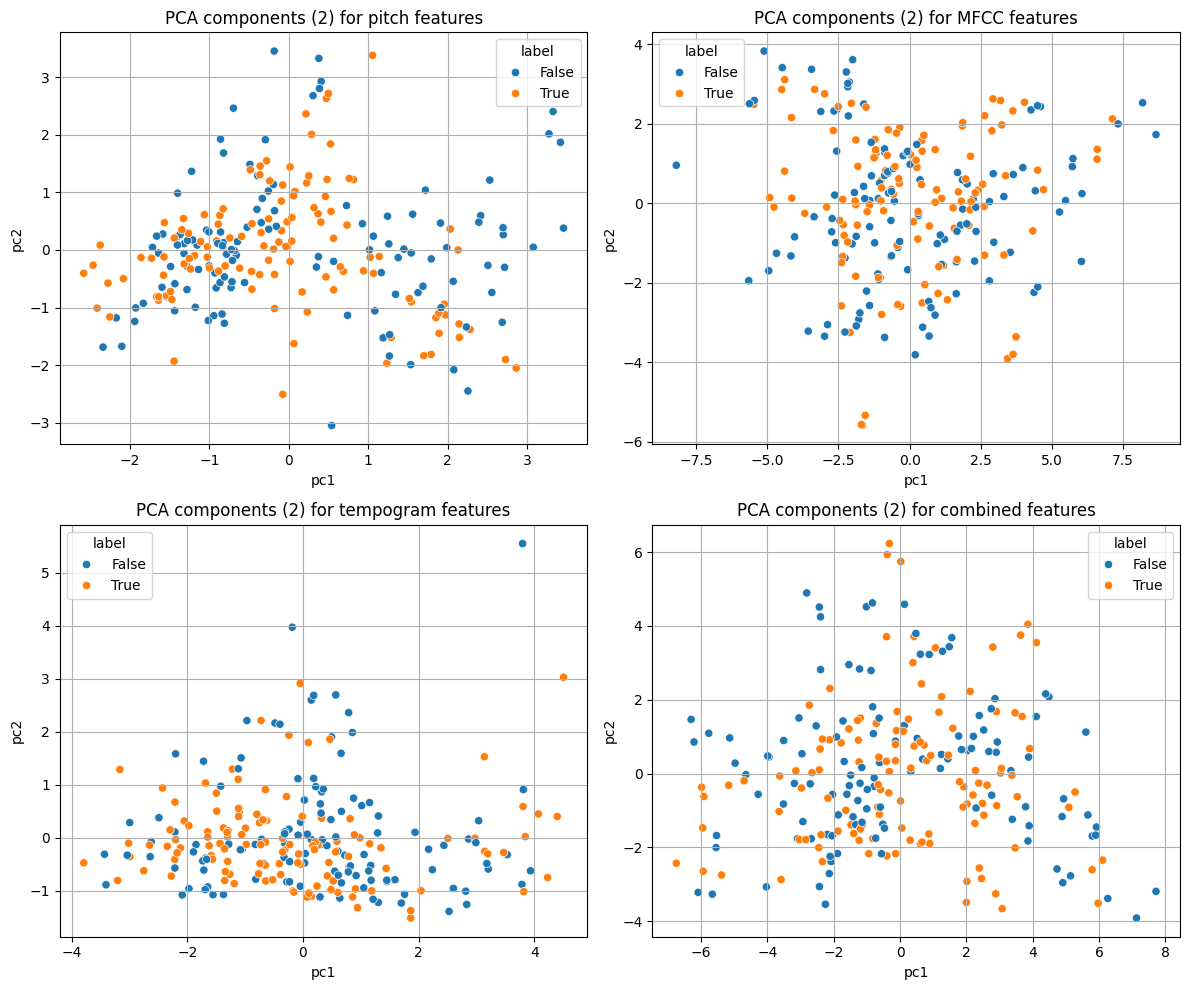

In [23]:
dataframes = [pitch_df, MFCC_df, tempogram_df, combined_feat_df]
titles = ["PCA components (2) for pitch features", "PCA components (2) for MFCC features", "PCA components (2) for tempogram features", "PCA components (2) for combined features"]
pca_dfs = []
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

#loop over dataframes and generate plots
for idx, df in enumerate(dataframes):
    scaler = StandardScaler() #standardise features
    scaled_data = scaler.fit_transform(df)
    
    pca = PCA(n_components=2) #reduce feats to 2 components
    pca_result = pca.fit_transform(scaled_data) #perform PCA on scaled data

    pca_df = pd.DataFrame(pca_result, columns=['pc1', 'pc2']) #create pca dataframe with 2 components as cols
    pca_df['label'] = pd.Series(y) #add labels
    pca_dfs.append(pca_df) #append pca df to list
    
    #plot 4 subplots of each PCA dataset
    ax = axes[idx // 2, idx % 2]
    sns.scatterplot(x='pc1', y='pc2', data=pca_df, hue='label', ax=ax)
    ax.set_title(titles[idx])
    ax.grid()
    
plt.tight_layout()
plt.show()

For all four datasets, very little distinction between class labels can be seen since the true and false scatter patterns for all datasets are overlapping each other. In this way, peforming PCA to reduce the feature sets to two components is limited in its help for understanding the underlying data structure and potential relationships between features visually. As such, the scatter patterns will now be explored from a separation and compactness perspective using metrics. Please see below. 

**Evaluating Seperation Between True and False Labels & Compactness of True/False Labels**

As mentioned in the methodology section above, the calculations of proximity cost functions can be used as a conceptual framework for computing Bayesian posterior probabilities. In particular, we can calculate the inter-cluster scatter between truth labelled samples and false labelled samples to understand separation, and the inter-cluster scatter for truth and false labels to understand compactness. In this way, datasets that have higher separation and lower compactness are likely to improve a model's classification accuracy, as they allow for clearer differentiation between classes and minimise overlap; thus, enhancing the model's ability to distinguish between different categories.

In [24]:
def get_proximity_cost(df, label):
    #scale features first so they are proportional to each other
    scaler = StandardScaler()
    standardised_features = scaler.fit_transform(df)
    df_copy = df.copy()
    df_copy['label'] = pd.Series(label)

    truth_samples = standardised_features[df_copy['label'] == True]
    false_samples = standardised_features[df_copy['label'] == False]
    
    centroid_true = np.mean(truth_samples, axis=0) #calculate mean of all values that are labelled 'true' (i.e. truth story)
    centroid_false = np.mean(false_samples, axis=0) #calculate mean of all values that are labelled 'false' (i.e. deceptive story)
    
    inter_cluster_scatter = np.sum((centroid_true - centroid_false) ** 2) #calculate Euclidean distance between the centroids of the two 'clusters'.

    intra_scatter_true = np.sum(np.sum((truth_samples - centroid_true) ** 2, axis=1)) #calculate spread of 'cluster' for truth labels
    intra_scatter_false = np.sum(np.sum((false_samples - centroid_false) ** 2, axis=1)) #calculate spread of 'cluster' for deceptive labels

    result = {
        'inter-cluster scatter': inter_cluster_scatter,
        'intra-cluster true': intra_scatter_true, 
        'intra-cluster false': intra_scatter_false
    }
    return result

In [25]:
def get_proximity_cost_PCA (df_PCA, label_col):
    X_true = df_PCA.loc[df_PCA[label_col]==True].drop(columns=label_col)
    X_false = df_PCA.loc[df_PCA[label_col]==False].drop(columns=label_col)

    #calculate the centroids (means) of the True and False samples (i.e. Truth and Deceptive samples)
    centroid_true = np.mean(X_true, axis=0)
    centroid_false = np.mean(X_false, axis=0)

    pca_inter_scatter = np.linalg.norm(centroid_true - centroid_false) ** 2 #compute Euclidean distance between the two centroids

    pca_intra_scatter_true = np.sum(np.sum((X_true - centroid_true) ** 2, axis=1)) #calculate spread of 'cluster' for truth labels
    pca_intra_scatter_false = np.sum(np.sum((X_false - centroid_false) ** 2, axis=1)) #calculate spread of 'cluster' for deceptive labels

    result = {
        'inter-cluster scatter': pca_inter_scatter,
        'intra-cluster true': pca_intra_scatter_true, 
        'intra-cluster false': pca_intra_scatter_false
    }
    return result

In [26]:
#create dataframe to compare inter- and intra- 'cluster' metrics for each dataset 
datasets = {'Dataset_A_pitch': (pitch_df, y), 'Dataset_B_MFCC': (MFCC_df, y),'Dataset_C_tempogram': (tempogram_df, y),'Dataset_D_combined': (combined_feat_df, y)}
dataset_names = ['Dataset_A_pitch_PCA', 'Dataset_B_MFCC_PCA', 'Dataset_C_tempogram_PCA', 'Dataset_D_combined_PCA']

results = []
for name, (df, label) in datasets.items():
    result = get_proximity_cost(df, label)
    result['Dataset'] = name
    results.append(result)
for idx, (df) in enumerate(pca_dfs):
    result = get_proximity_cost_PCA(df, 'label')  #label already in pca dfs
    result['Dataset'] = dataset_names[idx]  #get name for pca df
    results.append(result)

df_results = pd.DataFrame(results).set_index('Dataset')
df_results

inter-cluster scatter  intra-cluster true  \
Dataset                                                              
Dataset_A_pitch                       0.088991          406.009658   
Dataset_B_MFCC                        0.631529         2945.833351   
Dataset_C_tempogram                   0.197083          460.941020   
Dataset_D_combined                    0.851456         3646.595038   
Dataset_A_pitch_PCA                   0.068958          308.818296   
Dataset_B_MFCC_PCA                    0.034679         1144.931351   
Dataset_C_tempogram_PCA               0.196850          452.639190   
Dataset_D_combined_PCA                0.061563         1341.487088   

                         intra-cluster false  
Dataset                                       
Dataset_A_pitch                   548.650866  
Dataset_B_MFCC                   3496.274879  
Dataset_C_tempogram               487.234012  
Dataset_D_combined               4222.317627  
Dataset_A_pitch_PCA               431.395390  
Dataset_B_MFCC_PCA               1541.415019  
Dataset_C_tempogram_PCA           481.666825  
Dataset_D_combined_PCA           1738.447084

**Comparison of Feature Datasets**

Dataset D with the combined feature set has the highest inter-cluster scatter, however, has very poor cluster compactness. When PCA is performed on this dataset, the inter-cluster scatter signficantly reduces, suggesting that dimensionality reduction is potentially leading to a loss of variance or infomation that was previously contributing to scatter separation. In this way, the dataset structure might be better represented in a lower-dimensional space. 

Dataset C has relatively low intra-cluster scatter, whilst also having a moderately good inter-cluster scatter (in context of these datasets). When PCA is performed, this is having very little impact on the scatter patterns of the truth and deceptive labels, suggesting that the dataset in its original feature space is perhaps already efficiently represented. 

Dataset A has a similar intra-cluster scatter to Dataset C, however its inter-cluster scatter is significantly weaker. Dataset B has a similar inter- and intra-cluster scatter to Dataset D, in that it has high inter-cluster scatter, but poor intra-cluster scatter, and when PCA is performed, the inter-cluster scatter becomes significantly worse. 

## 5.6. Feature Dataset Selection

In light of the analysis above, it has been decided to carry forward two feature datasets for model experimentation: **Dataset C** and **Dataset D**. 

Dataset C has been chosen due to its low intra-cluster scatters and moderate inter-cluster scatter; in this way, it can be considered well suited to modelling as it exhibits better cluster compactness whilst indicating sufficient seperation to potentially enhance the model's ability to distinguish between deception and truth effectively. 

Dataset D has been chosen for its very high scatter separation, albeit poor cluster compactness; accordingly, this strong separation has potential to still offer valuable discriminative power that could compensate for the lack of compactness, thereby still enabling the model to better distinguish between classes overall.  

The two chosen feature sets (i.e., duplicated Train set with differing extracted features) are then split into training and validation subsets. To ensure same narrator samples are kept together, a dataframe is created of the file names and corresponding labels, creating a mapping from file name to unique group id. A second version of this dataframe is prepared by dropping duplicates group ids, resulting in a list of unique narrators. This reduced dataframe is stratified by true and false labels, splitting narrators into training and validation groups. The unique group IDs in these splits are then matched back to the original dataframe, retrieving the full list of audio file indices associated with each group. These index lists are then used as keys for splitting feature arrays into training and validation sets.

In [27]:
#DataFrame for handling grouping by file names
data = pd.DataFrame({'file_name': file_names,'label': y})

#create mapping from file_name to unique group ID
data['group_id'] = data['file_name'].factorize()[0]

#get unique groups and corresponding labels
unique_groups = data[['group_id', 'label']].drop_duplicates()

#create stratified split of true and false stories from unique file recordings
train_groups, val_groups = train_test_split(unique_groups,test_size=0.2, stratify=unique_groups['label'], random_state=42)

#get the full index list from data df where group id matches id in train group and val group, respectively
train_indices = data[data['group_id'].isin(train_groups['group_id'])].index
val_indices = data[data['group_id'].isin(val_groups['group_id'])].index

**Dataset C - Train/Validation Sets:**

In [28]:
#use index lists as map for splitting feature array X and label array y into corresponding training and validation sets
X_train_C = X_tempogram[train_indices]
X_val_C = X_tempogram[val_indices]
y_train_C = y[train_indices]
y_val_C = y[val_indices]

X_train_C.shape, X_val_C.shape, y_train_C.shape, y_val_C.shape

((192, 4), (48, 4), (192,), (48,))

In [29]:
#check balance
counts_y_train_C = dict(zip(*np.unique(y_train_C, return_counts=True)))
counts_y_val_C = dict(zip(*np.unique(y_val_C, return_counts=True)))

print(f"Number of True values in y_train_C: {counts_y_train_C.get(True, 0)}")
print(f"Number of False values in y_train_C: {counts_y_train_C.get(False, 0)}")
print(f"Number of True values in y_va_C: {counts_y_val_C.get(True, 0)}")
print(f"Number of False values in y_val_C: {counts_y_val_C.get(False, 0)}")

Number of True values in y_train_C: 96
Number of False values in y_train_C: 96
Number of True values in y_va_C: 24
Number of False values in y_val_C: 24


**Dataset D - Train/Validation Sets:**

In [30]:
#use index lists as map for splitting feature array X and label array y into corresponding training and validation sets
X_train_D = X_combined[train_indices]
X_val_D = X_combined[val_indices]
y_train_D = y[train_indices]
y_val_D = y[val_indices]

X_train_D.shape, X_val_D.shape, y_train_D.shape, y_val_D.shape

((192, 33), (48, 33), (192,), (48,))

In [31]:
#check balance
counts_y_train_D = dict(zip(*np.unique(y_train_D, return_counts=True)))
counts_y_val_D = dict(zip(*np.unique(y_val_D, return_counts=True)))

print(f"Number of True values in y_train_D: {counts_y_train_D.get(True, 0)}")
print(f"Number of False values in y_train_D: {counts_y_train_D.get(False, 0)}")
print(f"Number of True values in y_val_D: {counts_y_val_D.get(True, 0)}")
print(f"Number of False values in y_val_D: {counts_y_val_D.get(False, 0)}")

Number of True values in y_train_D: 96
Number of False values in y_train_D: 96
Number of True values in y_val_D: 24
Number of False values in y_val_D: 24


# 6. Experiments and results

In this section the following models have been selected for training and evaluation:
* SVM with Bagging
* Random Forest
* CatBoost

Subsequently, the following ensemble approach will be used to combine the individual power from the three models above, utilising the pre-tuned hyperparamters:
* Voting Ensemble

Each model will be employ stratified K-fold cros-validation, and GridSearchCV for hyper-parameter tuning. CatBoost will utilise it's own internal capabilities for this. After each model is trained, the validation dataset will be passed through the model and a classification report will be produced to get an initial understanding of performance from various metrics. To further understand model performance, bootstrapping will be applied to the validation set, generating a dataframe of classification metrics for each iteration. Using 'Accuracy' as the metric, the distribution of 'Accuracy' scores from across all bootstrap iterations will be plotted as a histogram. From this, confidence intervals will be calculated to help interpret and compare model performance. 10,000 bootstrap iterations are generated for confidence interval stability.

Dataset C will first be explored, followed by Dataset D. After this, results from both pipeline streams will be compared to determine final feature set and model selection. The chosen feature set and model will then be built into a deployable pipeline, trained on the 'full' Train set, and deployed on the Test set.

In [33]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, VotingClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier, Pool
from sklearn.utils import resample

In [34]:
#function to extract metrics from classification report
def extract_classification_metrics(model, X_val, y_val):
    y_pred = model.predict(X_val)
    report = classification_report(y_val, y_pred, output_dict=True)
    
    metrics = {
        f"{key}_{metric}": value
        for key, values in report.items() if isinstance(values, dict)
        for metric, value in values.items()
    }
    metrics['accuracy'] = report.get('accuracy', None)
    return metrics

#function to bootstrap validation set, getting classification metrics for each iteration and adding to dataframe
def bootstrap_validation(X_val, y_val, model, iterations=10):
    metrics_list = []
    val_data = pd.DataFrame(X_val)
    val_data['label'] = y_val

    for i in range(iterations):
        bootstrapped_data = resample(val_data, replace=True)
        X_bootstrap = bootstrapped_data.iloc[:, :-1].values
        y_bootstrap = bootstrapped_data['label'].values
        
        metrics = extract_classification_metrics(model, X_bootstrap, y_bootstrap)
        metrics['Iteration'] = i + 1 
        metrics_list.append(metrics)

    return pd.DataFrame(metrics_list)

In [35]:
def get_mean_classification_report (df):
    mean_values = df.mean()
    classification_report_df = pd.DataFrame({
        'Class': ['False', 'True', 'macro avg', 'weighted avg'],
        'precision': [mean_values['False_precision'], mean_values['True_precision'], mean_values['macro avg_precision'], mean_values['weighted avg_precision']],
        'recall': [mean_values['False_recall'], mean_values['True_recall'], mean_values['macro avg_recall'], mean_values['weighted avg_recall']],
        'f1-score': [mean_values['False_f1-score'], mean_values['True_f1-score'], mean_values['macro avg_f1-score'], mean_values['weighted avg_f1-score']],
        'support': [mean_values['False_support'], mean_values['True_support'], mean_values['macro avg_support'], mean_values['weighted avg_support']],
        'accuracy': mean_values['accuracy']})
    print(classification_report_df)

## 6.1. Dataset C: Experiments & Results

### 6.1.1. Model 1C - SVM with Bagging

In [36]:
#Create pipeline, scale variables for model and define classifier model 
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', SVC(random_state=42))
])

#define params for gridsearchCV (incl. bagging params)
param_grid = {
    'estimator__classifier__C': [0.1, 1, 10],
    'estimator__classifier__kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'estimator__classifier__gamma': ['scale', 'auto'],
    'estimator__classifier__degree': [3, 4],
    'n_estimators': [50, 100, 200],
}

#initialise kfold object
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

#create an ensemble from pipeline
bagging_classifier = BaggingClassifier(estimator=pipeline, random_state=42)

#fine tune hyperparameters for ensemble model with grid search 
grid_search = GridSearchCV(estimator=bagging_classifier, param_grid=param_grid, cv=kfold, n_jobs=-1, verbose=1)
grid_search.fit(X_train_C, y_train_C)

#get best model from grid_searh (i.e. with best hyperparameters) and get predictions
best_svm_model_C = grid_search.best_estimator_
y_pred_C = best_svm_model_C.predict(X_val_C)

print(f"Best parameters found: {grid_search.best_params_}")
print(classification_report(y_val_C, y_pred_C))

Fitting 5 folds for each of 144 candidates, totalling 720 fits


C:\Users\sgked\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast


Best parameters found: {'estimator__classifier__C': 1, 'estimator__classifier__degree': 3, 'estimator__classifier__gamma': 'scale', 'estimator__classifier__kernel': 'rbf', 'n_estimators': 100}
              precision    recall  f1-score   support

       False       0.81      0.88      0.84        24
        True       0.86      0.79      0.83        24

    accuracy                           0.83        48
   macro avg       0.84      0.83      0.83        48
weighted avg       0.84      0.83      0.83        48



*Bootstrap Validation*
- 

In [37]:
bootstrap_results_M1C = bootstrap_validation(X_val_C, y_val_C, best_svm_model_C, iterations=10000)

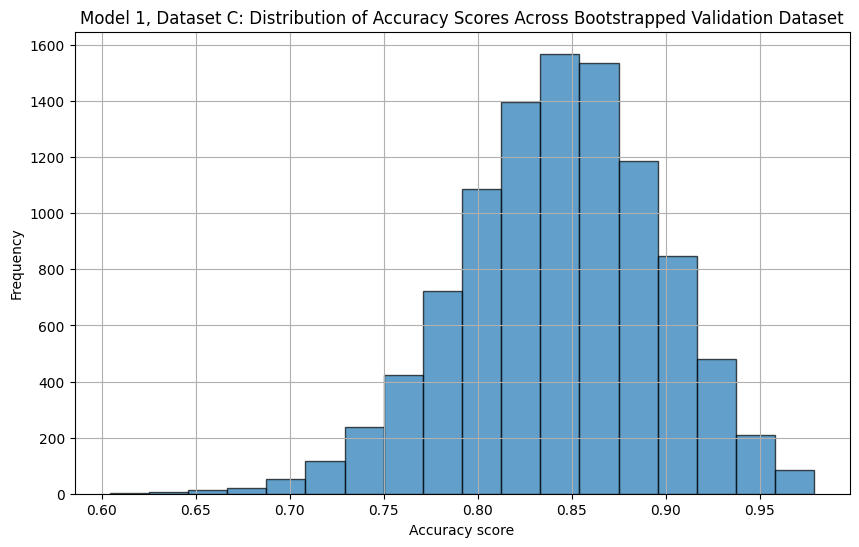

In [38]:
accuracy_scores_M1C = bootstrap_results_M1C['accuracy']

plt.figure(figsize=(10, 6))
plt.hist(accuracy_scores_M1C, bins=18, edgecolor='black', alpha=0.7)
plt.title('Model 1, Dataset C: Distribution of Accuracy Scores Across Bootstrapped Validation Dataset')
plt.xlabel('Accuracy score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [39]:
print(f"Model 1C has a 95% Confidence Interval of an accuracy score between {bootstrap_results_M1C['accuracy'].quantile(0.025)} and {bootstrap_results_M1C['accuracy'].quantile(0.975)}.")
print(f"Model 1C has a 99% Confidence Interval of an accuracy score between {bootstrap_results_M1C['accuracy'].quantile(0.005)} and {bootstrap_results_M1C['accuracy'].quantile(0.995)}.\n")
print(f"Classification Report of Mean Values from Bootstrapped Validation Iterations:\n")
display(get_mean_classification_report(bootstrap_results_M1C))

Model 1C has a 95% Confidence Interval of an accuracy score between 0.7291666666666666 and 0.9375.
Model 1C has a 99% Confidence Interval of an accuracy score between 0.6875 and 0.9583333333333334.

Classification Report of Mean Values from Bootstrapped Validation Iterations:

          Class  precision    recall  f1-score  support  accuracy
0         False   0.807577  0.874908  0.837167  23.9913   0.83315
1          True   0.863322  0.791414  0.822588  24.0087   0.83315
2     macro avg   0.835450  0.833161  0.829877  48.0000   0.83315
3  weighted avg   0.841119  0.833150  0.832823  48.0000   0.83315


None

At a 95% confidence interval (CI), the accuracy range spans from 0.73 to 0.94, and a 99% CI has an accuracy range that spans 0.69 to 0.96. Both intervals suggest the model performs well, particularly as neither interval includes 0.5, indicating that there is a strong degree of confidence that the model will perform better than random chance.

From the classification report of mean values from the bootstrapped iterations, we can see that the model achieves high performance with an overall mean accuracy of 83.3%. Both classes are predicted well, showing similar macro avg precision and recall, indicating balanced accuracy with True and False instance accuracy.  

### 6.1.2. Model 2C - Random Forest

In [40]:
#initialise kfold object
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

#define random forest model
rf_model = RandomForestClassifier(random_state=42)

#define param grid for fine tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

#perform gridsearchCV to fine tune random forest hyperparamters
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=kfold, n_jobs=-1, verbose=1)
grid_search.fit(X_train_C, y_train_C)

#get best model from gridsearchCV
best_rf_model_C = grid_search.best_estimator_

#get predictions 
y_pred_C = best_rf_model_C.predict(X_val_C)

print(f"Best parameters found: {grid_search.best_params_}")
print(classification_report(y_val_C, y_pred_C))

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best parameters found: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
              precision    recall  f1-score   support

       False       0.54      0.62      0.58        24
        True       0.55      0.46      0.50        24

    accuracy                           0.54        48
   macro avg       0.54      0.54      0.54        48
weighted avg       0.54      0.54      0.54        48



C:\Users\sgked\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast


*Bootstrap validation*
-

In [41]:
bootstrap_results_M2C= bootstrap_validation(X_val_C, y_val_C, best_rf_model_C, iterations=10000)

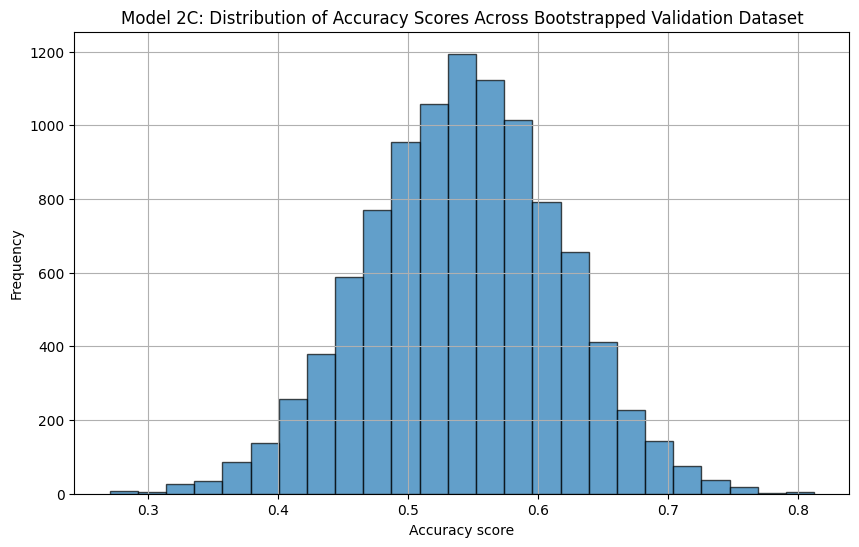

In [42]:
accuracy_scores_M2C = bootstrap_results_M2C['accuracy']

plt.figure(figsize=(10, 6))
plt.hist(accuracy_scores_M2C, bins=25, edgecolor='black', alpha=0.7)
plt.title('Model 2C: Distribution of Accuracy Scores Across Bootstrapped Validation Dataset')
plt.xlabel('Accuracy score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [43]:
print(f"Model 2C has a 30% Confidence Interval of an accuracy score between {bootstrap_results_M2C['accuracy'].quantile(0.35)} and {bootstrap_results_M2C['accuracy'].quantile(0.65)}.")
print(f"Model 2C has a 40% Confidence Interval of an accuracy score between {bootstrap_results_M2C['accuracy'].quantile(0.3)} and {bootstrap_results_M2C['accuracy'].quantile(0.7)}.\n")
print(f"Classification Report of Mean Values from Bootstrapped Validation Iterations:\n")
display(get_mean_classification_report(bootstrap_results_M2C))

Model 2C has a 30% Confidence Interval of an accuracy score between 0.5208333333333334 and 0.5625.
Model 2C has a 40% Confidence Interval of an accuracy score between 0.5 and 0.5833333333333334.

Classification Report of Mean Values from Bootstrapped Validation Iterations:

          Class  precision    recall  f1-score  support  accuracy
0         False   0.536472  0.625858  0.573013  24.0036  0.542315
1          True   0.550766  0.458978  0.494976  23.9964  0.542315
2     macro avg   0.543619  0.542418  0.533995  48.0000  0.542315
3  weighted avg   0.553760  0.542315  0.539041  48.0000  0.542315


None

At a 30% CI, the accuracy range spans from 0.52 to 0.56, suggesting that the model's accuracy is likely above random chance (50%) within this narrow range, but with low confidence (30%). At a 40% CI, the range spans from 0.50 to 0.58; since this interval includes 0.5, it introduces the possibility that the model's accuracy may not be better than random chance. Overall, these low CIs suggest limited certainty about the model's ability to consistently perform better than random.

This model shows lower performance with an overall accuracy of 54.2%. While the precision and recall are relatively balanced between classes, the f1 score for the True class indicates some struggle; that is to say, this model struggles to differentiate 'True' stories as effectively as it does 'False' stories.

### 6.1.3. Model 3C - Catboost

In [44]:
#convert training and validation data into CatBoost Pools
train_pool_C = Pool(X_train_C, y_train_C)
val_pool_C = Pool(X_val_C, y_val_C)

#define param grid
param_grid = {
    'iterations': [100, 200],
    'depth': [6, 8],
    'learning_rate': [0.01, 0.05, 0.1],
    'l2_leaf_reg': [3, 5, 10],
    'subsample': [0.8, 1.0]
}

#perform grid search using catboost's inbuilt hyperparameter tuning
catboost_model = CatBoostClassifier(random_state=42, logging_level='Silent')
grid_search_result = catboost_model.grid_search(param_grid, train_pool_C, cv=5, verbose=0)

#fit the best model
best_CB_model_C = CatBoostClassifier(**grid_search_result['params'], random_state=42, silent=True)
best_CB_model_C.fit(train_pool_C)

#get predictions
y_pred_C = best_CB_model_C.predict(X_val_C)

print("Best Parameters:", grid_search_result['params'])
print(classification_report(y_val_C, y_pred_C))

Best Parameters: {'subsample': 1, 'depth': 8, 'learning_rate': 0.1, 'l2_leaf_reg': 10, 'iterations': 100}
              precision    recall  f1-score   support

       False       0.80      0.83      0.82        24
        True       0.83      0.79      0.81        24

    accuracy                           0.81        48
   macro avg       0.81      0.81      0.81        48
weighted avg       0.81      0.81      0.81        48



*Bootstrap validation*
- 

In [45]:
bootstrap_results_M3C = bootstrap_validation(X_val_C, y_val_C, best_CB_model_C, iterations=10000)

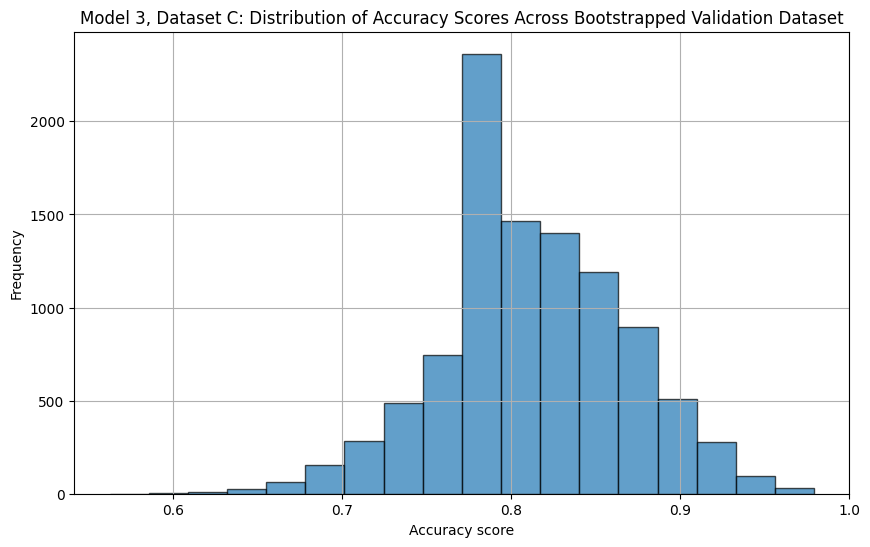

In [46]:
accuracy_scores_M3C = bootstrap_results_M3C['accuracy']

plt.figure(figsize=(10, 6))
plt.hist(accuracy_scores_M3C, bins=18, edgecolor='black', alpha=0.7)
plt.title('Model 3, Dataset C: Distribution of Accuracy Scores Across Bootstrapped Validation Dataset')
plt.xlabel('Accuracy score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [47]:
print(f"Model 3C has a 95% Confidence Interval of an accuracy score between {bootstrap_results_M3C['accuracy'].quantile(0.025)} and {bootstrap_results_M3C['accuracy'].quantile(0.975)}.")
print(f"Model 3C has a 99% Confidence Interval of an accuracy score between {bootstrap_results_M3C['accuracy'].quantile(0.005)} and {bootstrap_results_M3C['accuracy'].quantile(0.995)}.")
print(f"\nClassification Report of Mean Values from Bootstrapped Validation Iterations\n")
display(get_mean_classification_report(bootstrap_results_M3C))

Model 3C has a 95% Confidence Interval of an accuracy score between 0.6875 and 0.9166666666666666.
Model 3C has a 99% Confidence Interval of an accuracy score between 0.6666666666666666 and 0.9375.

Classification Report of Mean Values from Bootstrapped Validation Iterations

          Class  precision    recall  f1-score  support  accuracy
0         False   0.799984  0.833507  0.813199  24.0093    0.8124
1          True   0.826016  0.791505  0.804904  23.9907    0.8124
2     macro avg   0.813000  0.812506  0.809052  48.0000    0.8124
3  weighted avg   0.819415  0.812400  0.812315  48.0000    0.8124


None

At a 95% confidence interval (CI), the accuracy range spans from 0.69 to 0.92, and a 99% CI has an accuracy range that spans 0.67 to 0.94. Both intervals suggest the model performs well, particularly as neither interval includes 0.5, indicating that there is a strong degree of confidence that the model will perform better than random chance.

From the classification report of mean values, this model shows a high performance, achieving an overall mean accuracy of 81.2%. Moreover, the precision, recall and f1-scores across classes are near parity, suggesting a strong and consistent classification ability. 

### 6.1.4. Model 4C - Voting Ensemble

In [50]:
#define individual models using hyperparameters from model experimentation above
svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(C=1, gamma='scale', kernel='rbf'))
])
rf_model = RandomForestClassifier(bootstrap=False, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100)
catboost_model = CatBoostClassifier(subsample=1, depth=8, learning_rate=0.1, l2_leaf_reg=10, iterations=100, logging_level='Silent')

#create VotingClassifier ensemble with all three models
voting_model = VotingClassifier(estimators=[('svm', svm_pipeline), ('rf', rf_model), ('catboost', catboost_model)])

#set hyper param grid for fine tuning
param_grid = {
    'voting': ['hard', 'soft'], 
    'n_jobs': [-1] 
}

#initialise stratified k-fold split for cross validation
skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

#grid search to fine-tune the ensemble VotingClassifier
grid_search = GridSearchCV(estimator=voting_model, param_grid=param_grid, cv=skfold, n_jobs=-1)
grid_search.fit(X_train_C, y_train_C)

#get best model and get predictions
best_vote_model_C = grid_search.best_estimator_
y_pred_C = best_vote_model_C.predict(X_val_C)

print("Best parameters found:", grid_search.best_params_)
print(classification_report(y_val_C, y_pred_C))

C:\Users\sgked\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_search.py:1103: UserWarning: One or more of the test scores are non-finite: [0.51565452        nan]


Best parameters found: {'n_jobs': -1, 'voting': 'hard'}
              precision    recall  f1-score   support

       False       0.77      0.83      0.80        24
        True       0.82      0.75      0.78        24

    accuracy                           0.79        48
   macro avg       0.79      0.79      0.79        48
weighted avg       0.79      0.79      0.79        48



*Bootstrap Validation*
-

In [51]:
bootstrap_results_M4C = bootstrap_validation(X_val_C, y_val_C, best_vote_model_C , iterations=10000)

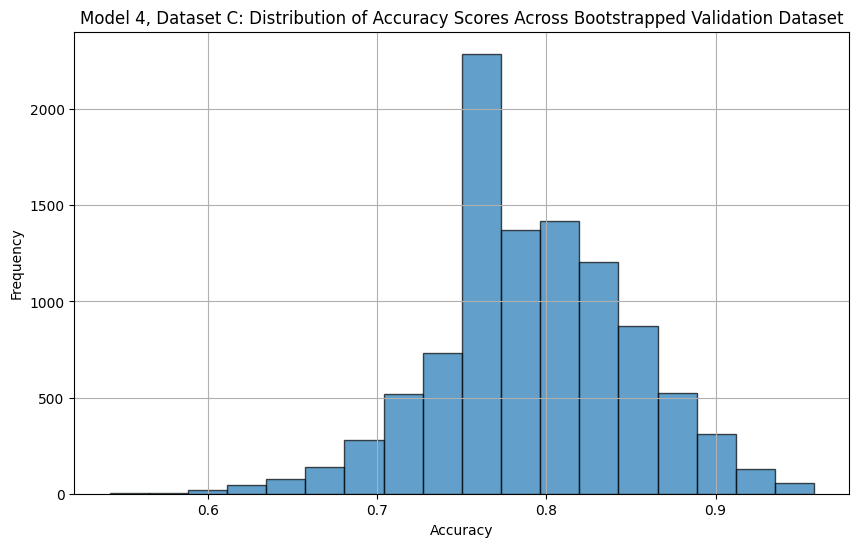

In [52]:
accuracy_scores_M4C = bootstrap_results_M4C['accuracy']

plt.figure(figsize=(10, 6))
plt.hist(accuracy_scores_M4C, bins=18, edgecolor='black', alpha=0.7)
plt.title('Model 4, Dataset C: Distribution of Accuracy Scores Across Bootstrapped Validation Dataset')
plt.xlabel('Accuracy')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [53]:
print(f"Model 4C has a 95% Confidence Interval of an accuracy score between {bootstrap_results_M4C['accuracy'].quantile(0.025)} and {bootstrap_results_M4C['accuracy'].quantile(0.975)}.")
print(f"Model 4C has a 99% Confidence Interval of an accuracy score between {bootstrap_results_M4C['accuracy'].quantile(0.005)} and {bootstrap_results_M4C['accuracy'].quantile(0.995)}.")
print(f"\nClassification Report of Mean Values from Bootstrapped Validation Iterations\n")
display(get_mean_classification_report(bootstrap_results_M4C))

Model 4C has a 95% Confidence Interval of an accuracy score between 0.6666666666666666 and 0.8958333333333334.
Model 4C has a 99% Confidence Interval of an accuracy score between 0.625 and 0.9375.

Classification Report of Mean Values from Bootstrapped Validation Iterations

          Class  precision    recall  f1-score  support  accuracy
0         False   0.768937  0.834823  0.797245  23.9714  0.792346
1          True   0.819740  0.749923  0.779508  24.0286  0.792346
2     macro avg   0.794338  0.792373  0.788377  48.0000  0.792346
3  weighted avg   0.801307  0.792346  0.791976  48.0000  0.792346


None

At a 95% confidence interval (CI), the accuracy range spans from 0.66 to 0.90, and a 99% CI has an accuracy range that spans 0.63 to 0.94. Both intervals suggest the model performs well, particularly as neither interval includes 0.5, indicating that there is a strong degree of confidence that the model will perform better than random chance.

This model also has a high overall mean accuracy score of 79.2%. Compared to Model M1C, the f1-scores are slightly lower, however, the macro and weighted avgs still align closely, suggesting the model has reliable performance.

## 6.2. Dataset D: Experiments & Results

### 6.2.1. Model 1D - SVM with Bagging

In [54]:
#Create pipeline, scale variables for model and define classifier model 
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', SVC(random_state=42))
])

#define params for gridsearchCV (incl. bagging params)
param_grid = {
    'estimator__classifier__C': [0.1, 1, 10],
    'estimator__classifier__kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'estimator__classifier__gamma': ['scale', 'auto'],
    'estimator__classifier__degree': [3, 4],
    'n_estimators': [50, 100, 200],
}

#initialise kfold object
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

#create an ensemble from pipeline
bagging_classifier = BaggingClassifier(estimator=pipeline, random_state=42)

#fine tune hyperparameters for ensemble model with grid search 
grid_search = GridSearchCV(estimator=bagging_classifier, param_grid=param_grid, cv=kfold, n_jobs=-1, verbose=1)
grid_search.fit(X_train_D, y_train_D)

#get best model from grid_searh (i.e. with best hyperparameters)
best_svm_model_D = grid_search.best_estimator_

#get predictions 
y_pred_D = best_svm_model_D.predict(X_val_D)

print(f"Best parameters found: {grid_search.best_params_}")
print(classification_report(y_val_D, y_pred_D))

Fitting 5 folds for each of 144 candidates, totalling 720 fits
Best parameters found: {'estimator__classifier__C': 10, 'estimator__classifier__degree': 3, 'estimator__classifier__gamma': 'scale', 'estimator__classifier__kernel': 'rbf', 'n_estimators': 100}
              precision    recall  f1-score   support

       False       0.63      0.50      0.56        24
        True       0.59      0.71      0.64        24

    accuracy                           0.60        48
   macro avg       0.61      0.60      0.60        48
weighted avg       0.61      0.60      0.60        48



*Bootstrap validation*
- 

In [55]:
bootstrap_results_M1D = bootstrap_validation(X_val_D, y_val_D, best_svm_model_D, iterations=10000)

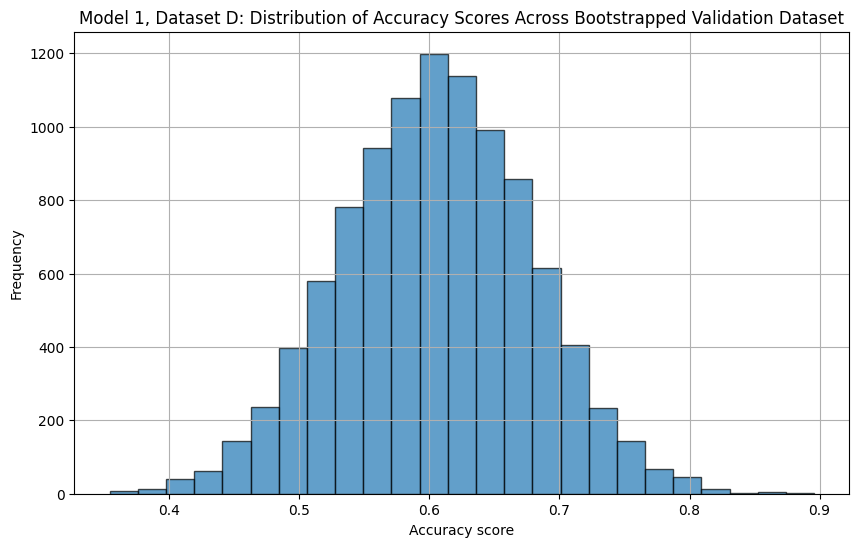

In [56]:
accuracy_scores_M1D = bootstrap_results_M1D['accuracy']

plt.figure(figsize=(10, 6))
plt.hist(accuracy_scores_M1D, bins=25, edgecolor='black', alpha=0.7)
plt.title('Model 1, Dataset D: Distribution of Accuracy Scores Across Bootstrapped Validation Dataset')
plt.xlabel('Accuracy score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [57]:
print(f"Model 1D has a 80% Confidence Interval of an accuracy score between {bootstrap_results_M1D['accuracy'].quantile(0.1)} and {bootstrap_results_M1D['accuracy'].quantile(0.9)}.")
print(f"Model 1D has a 85% Confidence Interval of an accuracy score between {bootstrap_results_M1D['accuracy'].quantile(0.075)} and {bootstrap_results_M1D['accuracy'].quantile(0.925)}.")
print(f"\nClassification Report of Mean Values from Bootstrapped Validation Iterations\n")
display(get_mean_classification_report(bootstrap_results_M1D))

Model 1D has a 80% Confidence Interval of an accuracy score between 0.5208333333333334 and 0.6875.
Model 1D has a 85% Confidence Interval of an accuracy score between 0.5 and 0.7083333333333334.

Classification Report of Mean Values from Bootstrapped Validation Iterations

          Class  precision    recall  f1-score  support  accuracy
0         False   0.633349  0.501665  0.553991  24.0024  0.605506
1          True   0.587393  0.709598  0.638308  23.9976  0.605506
2     macro avg   0.610371  0.605631  0.596150  48.0000  0.605506
3  weighted avg   0.620148  0.605506  0.601029  48.0000  0.605506


None

At a 80% CI, the accuracy range spans from 0.52 to 0.69, suggesting that the model's accuracy is likely above random chance (50%) within this range, and moderate CI. At a 85% CI, the range spans from 0.50 to 0.71; since this interval includes 0.5, it introduces the possibility that the model's accuracy may not be better than random chance. Overall, an 80% CI suggests a relative amount of certainty about the model's ability to consistently perform better than random.

From this classification report of mean values, this model's performance can be understood as moderate with an overall accuracy of 60.6%. Whilst it classifies the True class better with a recall value of 0.71, it struggles with the False class achieving a recall value of 0.502. Precision differences across both classes also indicate there is room for improvement in prediction balance.

### 6.2.2. Model 2D - Random Forest

In [58]:
#initialise kfold object
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

#define random forest model
rf_model = RandomForestClassifier(random_state=42)

#define param grid for fine tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

#perform gridsearchCV to fine tune random forest hyperparamters
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=kfold, n_jobs=-1, verbose=1)
grid_search.fit(X_train_D, y_train_D)

#get best model from gridsearchCV
best_rf_model_D = grid_search.best_estimator_

#get predictions 
y_pred_D = best_rf_model_D.predict(X_val_D)

print(f"Best parameters found: {grid_search.best_params_}")
print(classification_report(y_val_D, y_pred_D))

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best parameters found: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
              precision    recall  f1-score   support

       False       0.60      0.38      0.46        24
        True       0.55      0.75      0.63        24

    accuracy                           0.56        48
   macro avg       0.57      0.56      0.55        48
weighted avg       0.57      0.56      0.55        48



*Bootstrap validation*
- 

In [61]:
bootstrap_results_M2D = bootstrap_validation(X_val_D, y_val_D, best_rf_model_D, iterations=10000)

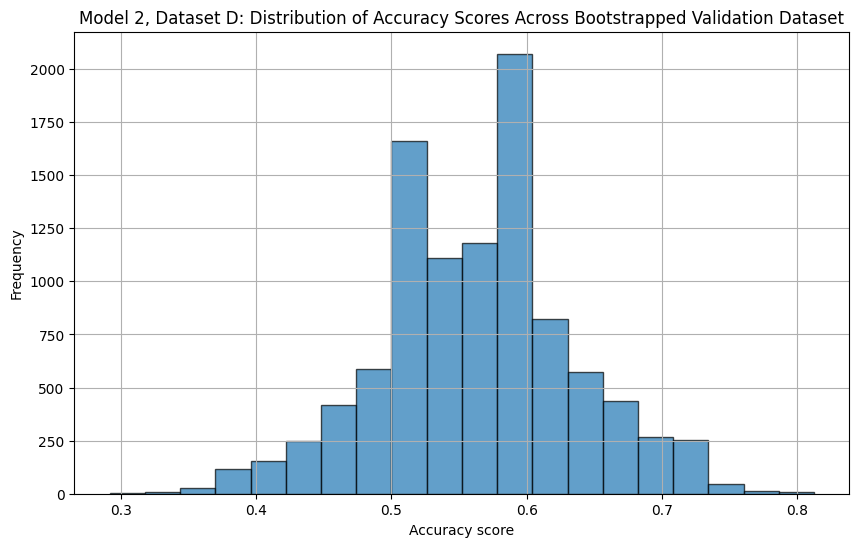

In [62]:
accuracy_scores_M2D = bootstrap_results_M2D['accuracy']

plt.figure(figsize=(10, 6))
plt.hist(accuracy_scores_M2D, bins=20, edgecolor='black', alpha=0.7)
plt.title('Model 2, Dataset D: Distribution of Accuracy Scores Across Bootstrapped Validation Dataset')
plt.xlabel('Accuracy score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [63]:
print(f"Model 2D has a 50% Confidence Interval of an accuracy score between {bootstrap_results_M2D['accuracy'].quantile(0.25)} and {bootstrap_results_M2D['accuracy'].quantile(0.75)}.")
print(f"Model 2D has a 60% Confidence Interval of an accuracy score between {bootstrap_results_M2D['accuracy'].quantile(0.2)} and {bootstrap_results_M2D['accuracy'].quantile(0.8)}.")
print(f"\nClassification Report of Mean Values from Bootstrapped Validation Iterations\n")
display(get_mean_classification_report(bootstrap_results_M2D))

Model 2D has a 50% Confidence Interval of an accuracy score between 0.5208333333333334 and 0.6041666666666666.
Model 2D has a 60% Confidence Interval of an accuracy score between 0.5 and 0.625.

Classification Report of Mean Values from Bootstrapped Validation Iterations

          Class  precision    recall  f1-score  support  accuracy
0         False   0.600804  0.375698  0.455866  23.9679  0.563648
1          True   0.546700  0.750925  0.628683  24.0321  0.563648
2     macro avg   0.573752  0.563311  0.542274  48.0000  0.563648
3  weighted avg   0.583787  0.563648  0.547406  48.0000  0.563648


None

At a 50% CI, the accuracy range spans from 0.52 to 0.60, suggesting that the model's accuracy is likely above random chance (50%) within this narrow range, but relatively low CI. At a 60% CI, the range spans from 0.50 to 0.63; since this interval includes 0.5, it introduces the possibility that the model's accuracy may not be better than random chance. Overall, a 50% CI suggests a relatively low amount of certainty about the model's ability to consistently perform better than random.

This model shows the weakest performance so far with an overall accuracy of 56.4%. Whilst it achieves good recall for the True class (0.75), this is negatively offset by lower precision (0.547), thereby resulting in a moderate f1-score. This disparity in performance between precision and recall is even greater for False labels, resulting in an even lower f1-score of 0.456. In this way, the model's performance can be understood as inconsistent in its prediction ability. 

### 6.2.3. Model 3D - CatBoost

In [64]:
#convert training and validation data into CatBoost Pools
train_pool_D = Pool(X_train_D, y_train_D)
val_pool_D = Pool(X_val_D, y_val_D)

#define param grid
param_grid = {
    'iterations': [100, 200],
    'depth': [6, 8],
    'learning_rate': [0.01, 0.05, 0.1],
    'l2_leaf_reg': [3, 5, 10],
    'subsample': [0.8, 1.0]
}

#perform grid search using catboost's inbuilt hyperparameter tuning
catboost_model = CatBoostClassifier(random_state=42, logging_level='Silent')
grid_search_result = catboost_model.grid_search(param_grid, train_pool_D, cv=5, verbose=0)

#fit the best model
best_CB_model_D = CatBoostClassifier(**grid_search_result['params'], random_state=42, silent=True)
best_CB_model_D.fit(train_pool_D)

#get predictions
y_pred_D = best_CB_model_D.predict(X_val_D)

print("Best Parameters:", grid_search_result['params'])
print(classification_report(y_val_D, y_pred_D))

Best Parameters: {'subsample': 0.8, 'depth': 6, 'learning_rate': 0.1, 'l2_leaf_reg': 3, 'iterations': 200}
              precision    recall  f1-score   support

       False       0.61      0.46      0.52        24
        True       0.57      0.71      0.63        24

    accuracy                           0.58        48
   macro avg       0.59      0.58      0.58        48
weighted avg       0.59      0.58      0.58        48



*Bootstrap validation*
- 

In [71]:
bootstrap_results_M3D = bootstrap_validation(X_val_D, y_val_D, best_CB_model_D, iterations=10000)

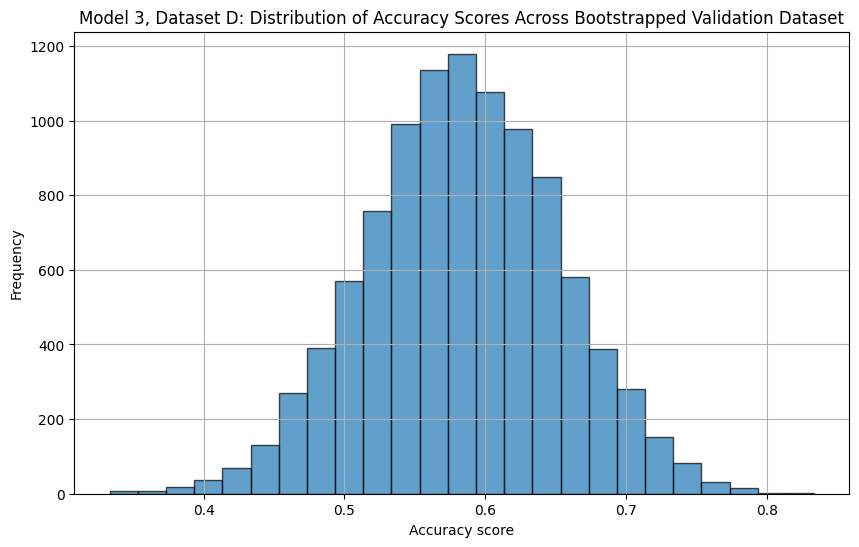

In [72]:
accuracy_scores_M3D = bootstrap_results_M3D['accuracy']

plt.figure(figsize=(10, 6))
plt.hist(accuracy_scores_M3D, bins=25, edgecolor='black', alpha=0.7)
plt.title('Model 3, Dataset D: Distribution of Accuracy Scores Across Bootstrapped Validation Dataset')
plt.xlabel('Accuracy score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [74]:
print(f"Model 3D has a 65% Confidence Interval of an accuracy score between {bootstrap_results_M3D['accuracy'].quantile(0.175)} and {bootstrap_results_M3D['accuracy'].quantile(0.825)}.")
print(f"Model 3D has a 70% Confidence Interval of an accuracy score between {bootstrap_results_M3D['accuracy'].quantile(0.15)} and {bootstrap_results_M3D['accuracy'].quantile(0.85)}.")
print(f"\nClassification Report of Mean Values from Bootstrapped Validation Iterations\n")
display(get_mean_classification_report(bootstrap_results_M3D))

Model 3D has a 65% Confidence Interval of an accuracy score between 0.5208333333333334 and 0.6458333333333334.
Model 3D has a 70% Confidence Interval of an accuracy score between 0.5 and 0.6666666666666666.

Classification Report of Mean Values from Bootstrapped Validation Iterations

          Class  precision    recall  f1-score  support  accuracy
0         False   0.611620  0.458946  0.518434  23.9799  0.584008
1          True   0.567396  0.708581  0.625896  24.0201  0.584008
2     macro avg   0.589508  0.583763  0.572165  48.0000  0.584008
3  weighted avg   0.599267  0.584008  0.577198  48.0000  0.584008


None

At a 65% CI, the accuracy range spans from 0.52 to 0.65, suggesting that the model's accuracy is likely above random chance (50%) within this range, and moderate CI. At a 70% CI, the range spans from 0.50 to 0.67; since this interval includes 0.5, it introduces the possibility that the model's accuracy may not be better than random chance. Overall, a 65% CI suggests a relative amount of certainty about the model's ability to consistently perform better than random.

This model achieves a slightly better overall mean accuracy socre of 58.4% compared to Model 2D, but not as good as Model 1D. There is also some inbalance between precision and recall for both classes, as indicated in their moderate f1-scores. In this way, these scores would indicate there's room for improvement in the model's overall predictive strength.

### 6.2.4. Model 4D - Voting Ensemble

In [75]:
#define individual models using hyperparameters from model experimentation above
svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(C=10, gamma='scale', kernel='rbf'))
])
rf_model = RandomForestClassifier(bootstrap=False, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50)
catboost_model = CatBoostClassifier(subsample=0.8, depth=6, learning_rate=0.1, l2_leaf_reg=3, iterations=200, logging_level='Silent')

#create VotingClassifier ensemble with all three models
voting_model = VotingClassifier(estimators=[('svm', svm_pipeline), ('rf', rf_model), ('catboost', catboost_model)])

#set hyper param grid for fine tuning
param_grid = {
    'voting': ['hard', 'soft'], 
    'n_jobs': [-1]  # Parallelism for the ensemble method
}

#initialise stratified k-fold split for cross validation
skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

#grid search to fine-tune the ensemble VotingClassifier
grid_search = GridSearchCV(estimator=voting_model, param_grid=param_grid, cv=skfold, n_jobs=-1)
grid_search.fit(X_train_D, y_train_D)

#get best model and get predictions
best_vote_model_D = grid_search.best_estimator_
y_pred_D = best_vote_model_D.predict(X_val_D)

print("Best parameters found:", grid_search.best_params_)
print(classification_report(y_val_D, y_pred_D))

C:\Users\sgked\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_search.py:1103: UserWarning: One or more of the test scores are non-finite: [0.94264507        nan]


Best parameters found: {'n_jobs': -1, 'voting': 'hard'}
              precision    recall  f1-score   support

       False       0.55      0.46      0.50        24
        True       0.54      0.62      0.58        24

    accuracy                           0.54        48
   macro avg       0.54      0.54      0.54        48
weighted avg       0.54      0.54      0.54        48



*Bootstrap validation*
- 

In [79]:
bootstrap_results_M4D = bootstrap_validation(X_val_D, y_val_D, best_vote_model_D, iterations=10000)

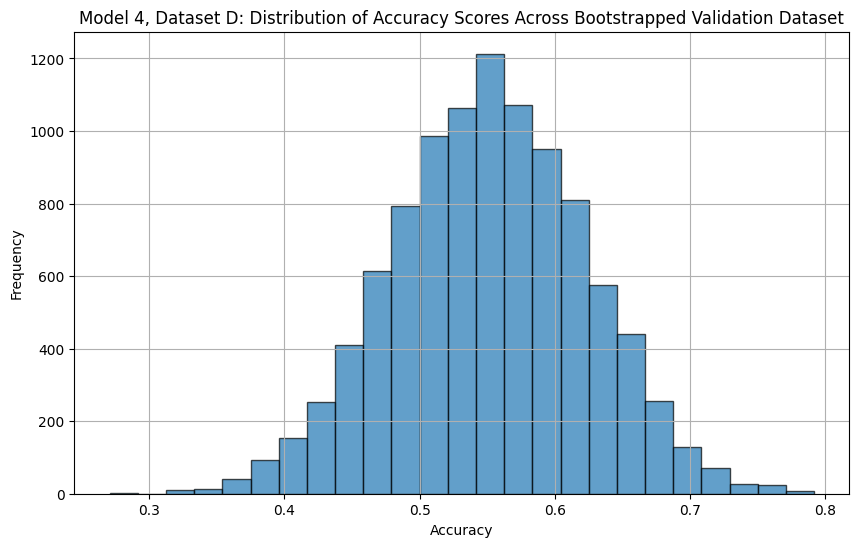

In [80]:
accuracy_scores_M4D = bootstrap_results_M4D['accuracy']

plt.figure(figsize=(10, 6))
plt.hist(accuracy_scores_M4D, bins=25, edgecolor='black', alpha=0.7)
plt.title('Model 4, Dataset D: Distribution of Accuracy Scores Across Bootstrapped Validation Dataset')
plt.xlabel('Accuracy')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [90]:
print(f"Model 4D has a 30% Confidence Interval of an accuracy score between {bootstrap_results_M4D['accuracy'].quantile(0.35)} and {bootstrap_results_M4D['accuracy'].quantile(0.65)}.")
print(f"Model 4D has a 40% Confidence Interval of an accuracy score between {bootstrap_results_M4D['accuracy'].quantile(0.3)} and {bootstrap_results_M4D['accuracy'].quantile(0.7)}.")
print(f"\nClassification Report of Mean Values from Bootstrapped Validation Iterations\n")
display(get_mean_classification_report(bootstrap_results_M4D))

Model 4D has a 30% Confidence Interval of an accuracy score between 0.5208333333333334 and 0.5625.
Model 4D has a 40% Confidence Interval of an accuracy score between 0.5 and 0.5833333333333334.

Classification Report of Mean Values from Bootstrapped Validation Iterations

          Class  precision    recall  f1-score  support  accuracy
0         False   0.549450  0.458032  0.493812  24.0218  0.540792
1          True   0.534721  0.623718  0.571011  23.9782  0.540792
2     macro avg   0.542086  0.540875  0.532412  48.0000  0.540792
3  weighted avg   0.552281  0.540792  0.537503  48.0000  0.540792


None

At a 30% CI, the accuracy range spans from 0.52 to 0.56, suggesting that the model's accuracy is likely above random chance (50%) within this range, and moderate CI. At a 40% CI, the range spans from 0.50 to 0.58; since this interval includes 0.5, it introduces the possibility that the model's accuracy may not be better than random chance. Overall, a 30% CI suggests a relatively low amount of certainty about the model's ability to consistently perform better than random.

This model has an overall mean accuracy of 54.1%, which is the worst performing model for this feature dataset. We can see from the classification report above that it performs reasonably well at identifying the True class with a recall score of 0.62, but struggles with False, only achieving a recall score of 0.46. Similar to the other models for Dataset D, it too also indicates inconsistency with predictions on account of its relatively low f1-scores. 

## 6.3. Model Comparisons

**Dataset C Results:**
- Model 1C, 95% CI:(0.73 to 0.94) and Mean Validation Accuracy of: 0.83
- Model 2C, 30% CI:(0.52 to 0.56) and Mean Validation Accuracy of: 0.54
- Model 3C, 95% CI:(0.69 to 0.92) and Mean Validation Accuracy of: 0.81
- Ensemble Model 4C, 95% CI:(0.66 to 0.9) and Mean Validation Accuracy of: 0.79

**Dataset D Results:**
- Model 1D, 80% CI:(0.52 to 0.69) and Mean Validation Accuracy of: 0.61
- Model 2D, 50% CI:(0.52 to 0.60) and Mean Validation Accuracy of: 0.56
- Model 3D, 65% CI:(0.52 to 0.65) and Mean Validation Accuracy of: 0.58
- Ensemble Model 4D, 30% CI:(0.52 to 0.56) and Mean Validation Accuracy of: 0.54

It is important to note that whilst confidence intervals have been provided, there is some limitation with their interpretability as they highly dependent on the quality of the training dataset and its overall representation of the population. If the wider population is unbalanced, then caution should be applied in interpreting the CIs for model performance since a balanced dataset has been used. That being said, in the context of this project, they do serve as a way to help compare performance for final selection.

Accordingly, from the results summarised above, we can see that Dataset C consistently performed better than Dataset D in all models, except when trained on a Random Forest model. Across both feature datasets, SVM model performs the best.

Dataset D has signficantly more features than Dataset C, and given the notable difference in model performance between the two datasets, this could indicate that there is too much noise in Dataset D for effective predictive training, particuarly with the size dataset that is being used to train the models. In this way, if Dataset D had a larger sample size, it could potentially provide a higher level of context for understanding the more complex patterns of a larger feature set that a smaller dataset size isn't capable of capturing. 

These results might also indicate that focusing on the rhythmic and speed variations of the audio samples, rather than the sound itself (i.e. pitch or relative pitch aspects), might be more effective when analysing vocal patterns across varying languages and genders. That is to say, tempogram features might be more resiliant to audio variances caused by language difference and gender, allowing the machine learning model to detect relevant variances related to truth or deception.

In light of the validation results, it has been decided to train the final model for the deployable pipeline using the feature set from Dataset C and utilising the Voting Ensemble approach for classification training. Although the SVM model for this feature set had a slightly higher accuracy and f1-scores for both labels, the voting ensemble approach still performed strongly and is likely to be more robust when handling data with greater variance after deployment.

## 6.4. Train Final Model

**Final Base Model Parameters: SVM**

In [91]:
#Create pipeline, scale variables for model and define classifier model 
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', SVC(random_state=42))
])

#define params for gridsearchCV (incl. bagging params)
param_grid = {
    'estimator__classifier__C': [0.1, 1, 10],
    'estimator__classifier__kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'estimator__classifier__gamma': ['scale', 'auto'],
    'estimator__classifier__degree': [3, 4],
    'n_estimators': [50, 100, 200],
}

#initialise kfold object
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

#create an ensemble from pipeline
bagging_classifier = BaggingClassifier(estimator=pipeline, random_state=42)

#fine tune hyperparameters for ensemble model with grid search 
SVM_grid_search = GridSearchCV(estimator=bagging_classifier, param_grid=param_grid, cv=kfold, n_jobs=-1, verbose=1)
SVM_grid_search.fit(X_tempogram, y)

#get best model from grid_searh (i.e. with best hyperparameters) and get predictions
final_base_model_SVM = SVM_grid_search.best_estimator_
final_base_SVM_params = SVM_grid_search.best_params_
print(f"fine-tuned hyperparameters for SVM base model for final Voting Ensemble model:\n {final_base_SVM_params}")

Fitting 5 folds for each of 144 candidates, totalling 720 fits
fine-tuned hyperparameters for SVM base model for final Voting Ensemble model:
 {'estimator__classifier__C': 0.1, 'estimator__classifier__degree': 3, 'estimator__classifier__gamma': 'scale', 'estimator__classifier__kernel': 'linear', 'n_estimators': 50}


**Final Base Model Parameters: Random Forest**

In [95]:
#initialise kfold object
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

#define random forest model
rf_model = RandomForestClassifier(random_state=42)

#define param grid for fine tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

#perform gridsearchCV to fine tune random forest hyperparamters
RF_grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=kfold, n_jobs=-1, verbose=1)
RF_grid_search.fit(X_tempogram, y)

#get best model from gridsearchCV
final_base_model_RF = RF_grid_search.best_estimator_
final_base_RF_params = RF_grid_search.best_params_
print(f"fine-tuned hyperparameters for Random Forest base model for final Voting Ensemble model:\n {final_base_RF_params}")

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
fine-tuned hyperparameters for Random Forest base model for final Voting Ensemble model:
 {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}


**Final Base Model Parameters: CatBoost**

In [96]:
#convert training and validation data into CatBoost Pools
train_pool = Pool(X_tempogram, y)

#define param grid
param_grid = {
    'iterations': [100, 200],
    'depth': [6, 8],
    'learning_rate': [0.01, 0.05, 0.1],
    'l2_leaf_reg': [3, 5, 10],
    'subsample': [0.8, 1.0]
}

#perform grid search using catboost's inbuilt hyperparameter tuning
catboost_model = CatBoostClassifier(random_state=42, logging_level='Silent')
CB_grid_search_result = catboost_model.grid_search(param_grid, train_pool, cv=5, verbose=0)

#fit the best model
final_base_model_CB = CatBoostClassifier(**grid_search_result['params'], random_state=42, silent=True)
final_base_model_CB.fit(train_pool)
final_base_CB_params = CB_grid_search_result['params']
print(f"fine-tuned hyperparameters for CatBoost base model for final Voting Ensemble model:\n {final_base_CB_params}")

fine-tuned hyperparameters for CatBoost base model for final Voting Ensemble model:
 {'subsample': 1, 'depth': 8, 'learning_rate': 0.1, 'l2_leaf_reg': 3, 'iterations': 100}


In [97]:
#define individual models using hyperparameters from model experimentation above
svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(C=0.1, gamma='scale', kernel='linear'))
])
rf_model = RandomForestClassifier(bootstrap=False, max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=200)
catboost_model = CatBoostClassifier(subsample=1, depth=8, learning_rate=0.1, l2_leaf_reg=3, iterations=100, logging_level='Silent')

#create VotingClassifier ensemble with all three models
voting_model = VotingClassifier(estimators=[('svm', svm_pipeline), ('rf', rf_model), ('catboost', catboost_model)])

#set hyper param grid for fine tuning
param_grid = {
    'voting': ['hard', 'soft']
}

#initialise stratified k-fold split for cross validation
skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

#grid search to fine-tune the ensemble VotingClassifier
grid_search = GridSearchCV(estimator=voting_model, param_grid=param_grid, cv=skfold, n_jobs=-1)
grid_search.fit(X_tempogram, y)

#get best model and get predictions
final_model = grid_search.best_estimator_

C:\Users\sgked\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_search.py:1103: UserWarning: One or more of the test scores are non-finite: [0.625   nan]


## 6.5. Deployable Pipeline

- recreate entire deployable pipeline with feature extraction and model implementation

In [98]:
def get_labels (file_IDs, labels_file):
    y = []
    for fileID in tqdm(file_IDs):
        yi = labels_file.loc[fileID]['Story_type'] == 'true_story'
        y.append(yi)
    return np.array(y), np.array(file_IDs)

In [99]:
def extract_tempogram_feats(x, sr):
    onset_env = librosa.onset.onset_strength(y=x, sr=sr) #compute onset strength envelope of audio clip (i.e. strength of detected onsets)
    tempogram = librosa.feature.tempogram(onset_envelope=onset_env, sr=sr) #compute tempo variations over time using onset strength envelope
    tmp_mean = np.mean(tempogram) #get mean of tempo strength across audio clip
    tmp_std = np.std(tempogram) #get std of tempo strength (i.e. variability)
    tmp_median = np.median(tempogram) #get median value of tempo strength distribution
    return tmp_mean, tmp_std, tmp_median

def deployable_pipeline (audio_file_ID_list, sample_path):
    X = []
    for file_ID in tqdm(audio_file_ID_list):
        file = f"{sample_path}\\{file_ID}"
        fs = None
        audio, fs = librosa.load(file, sr=fs)
        
        total_duration = len(audio) / fs
        if total_duration > 30:
            start_time = total_duration / 2 - 15
            start_sample = int(start_time * fs)
            end_sample = int(start_sample + 30 * fs)
            audio = audio[start_sample:end_sample]
        
        audio = audio/np.max(np.abs(audio))
        tmp_mean, tmp_std, tmp_median = extract_tempogram_feats(audio, fs)
        power = np.sum(audio**2)/len(audio)
        xi = [power, tmp_mean, tmp_std, tmp_median]
        X.append(xi)
        
    X_features = np.array(X)
    y_pred = final_model.predict(X_features)
    
    return np.array(y_pred), np.array(audio_file_ID_list)

In [100]:
#list of file IDs for audio test files
Testfiles = TestSet["X_paths"]

sample_path = "MLEnd\\deception\\MLEndDD_stories_small/"

#call func to get final test predictions
y_pred, processed_file_ids = deployable_pipeline(Testfiles, sample_path)

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:02<00:00,  6.75it/s]


In [101]:
y_test, file_ids_check = get_labels(Testfiles, MLEND_df)

100%|████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 9754.20it/s]


In [102]:
report_class = classification_report(y_test, y_pred,output_dict=True)
report_df = pd.DataFrame(report_class).transpose()
print(report_df)

              precision  recall  f1-score  support
False          0.444444    0.40  0.421053    10.00
True           0.454545    0.50  0.476190    10.00
accuracy       0.450000    0.45  0.450000     0.45
macro avg      0.449495    0.45  0.448622    20.00
weighted avg   0.449495    0.45  0.448622    20.00


# 7. Conclusions

**Conclusions:**

From the classification report above, the model performed worse than expected on the test set data. Accordingly, from the bootstrapped validation predictions, a mean accuracy score of 0.79 was achieved, whereas an accuracy score of only 0.45 was achieved on the Test set. Interestingly, a score of 0.45 indicates the model performs worse than random guessing, which is potentially a systematic pattern of errors we can exploit; accordingly, we can flip the predictions, which would achieve a better-than-chance peformance. However, additional testing would need to be carried out to determine if this viable solution for improved model performance. 

Although both the training and test set were evenly balanced with respect to truth or deception, these contrasting results to the validation testing would suggest that the training set was not representative of the test set in other aspects, such as language, gender or recording environment. This limitation in the dataset was noted in section 5 above. Accordingly, further investigation into language split in the training and validation data would be required to understand the impact of this on performance. In this way, earlier postulations of rhythmn and tempo features being more resilient to language or gender variations seems unlikely, or at least, needs further exploration with a larger dataset and better balance of language mix.

The lower recall value for False labels also suggests that the model particularly struggles to identify deception stories. Whilst the training and test dataset are balanced in this respect, this could indicate deceptive stories are more complex, making them harder to distinguish. It was noted in the section 5 that using a balanced dataset was a potential limitation in the dataset, thus, if deceptive stories are more prevalent in the wider population, this model is likely to perform significantly worse.

Overall, whilst the model suggests it has poor predictive power, there is potential in its inverse ability for misclassifcation and to flip the predictions.  


**Future recommendations:**
* It is recommended to explore a wider feature set mix within the dataset, not just tempogram features. In this way, it would be worthwhile taking a different sample from the MLEnd deception dataset and carry out additional testing and model experimentation with the full combined feature set of Dataset D.
* During model experimentation, the VotingClassifier as the ensemble method did indicate a slight weaker performance than just the SVM model itself. This could indicate that the VotingClassifier is not appropriate in this task. Other ensemble methods were experimented on, but hyper-parameter tuning proved difficult due to limited computation power. As such, exploring other ensemble methods, such as a StackingClassifier, in an environment with greater computational power are recommended.
* As noted in the problem formulation section at the start, differing cultural backgrounds and gender influences vocal cues in lying. Creating a dataset that effectively captures this full spectrum in order to effectively analyse audio patterns is likely to prove difficult. In this way, focusing on one language and including additional feature infomation, such as gender and whether the narrator is a native or non-native speaker, could perhaps help address variance in features related to these aspects that could be making truth or deception more difficult to distinguish. 

# 8. References

**Repositories**
* MLEnd Deception Dataset: https://github.com/MLEndDatasets/Deception/blob/main/MLEndDD_story_attributes_small.csv

**Papers**
* Dando CJ, T. P. (2023). Cross cultural verbal cues to deception: truth and lies in first and second language forensic interview contexts. Front. Psychol., 1-11.
* Pei, J. (2021, August 25). A Linguistic Analysis of Gender Differences in Lying Behaviors Among Politicians. Retrieved from Languaged Life: https://languagedlife.humspace.ucla.edu/language-and-gender/a-linguistic-analysis-of-gender-differences-in-lying-behaviors-among-politicians/

**Background reading:**
* Huawei Tao, Hang Yu, Man Liu, Hongliang Fu, Chunhua Zhu, Yue Xie. (2024). A semi-supervised high-quality pseudo labels algorithm based on multi-constraint optimization for speech deception detection Journal: Computer Speech & Language, Volume: 85
* Constancio AS, Tsunoda DF, Silva HdFN, Silveira JMd, Carvalho DR (2023) Deception detection with machine learning: A systematic review and statistical analysis. PLoS ONE 18(2): e0281323. https://doi.org/10.1371/journal.pone.0281323
* Yarbrough, Jillian R. (2020). The Science of Deception Detection: A literature and Policy Review on Police Ability to Detect Lies. Journal of Criminal Justice and Law, Vol 3, issue 2, pp40-58.


**Libraries**
* warnings: built-in Python library for issuing warning messages.
* numpy: a library for numerical operations on arrays and matrices.
* pandas: a library for data manipulation and analysis.
* seaborn: a data visualisation library based on matplotlib.
* matplotlib.pyplot: a library for plotting graphs and visualisations.
* sklearn.decomposition: PCA for dimensionality reduction.
* sklearn.preprocessing: StandardScaler and LabelEncoder for scaling and encoding data.
* sklearn.model_selection: for splitting data and performing cross-validation and grid search.
* librosa: for audio processing.
* IPython.display: for displaying audio files.
* tqdm: for displaying progress bars.
* mlend: for downloading and loading the deception_small dataset.
* sklearn.svm: for Support Vector Classifier (SVC).
* sklearn.pipeline: for creating machine learning pipelines.
* sklearn.ensemble: for ensemble methods like RandomForestClassifier, BaggingClassifier, and VotingClassifier.
* sklearn.metrics: for calculating classification metrics like the classification report.
* catboost: for CatBoostClassifier and Pool for handling categorical features.
* sklearn.utils: for utilities like resampling.

**Tools within libraries:**
* warnings.filterwarnings: Utility to control warning messages.
* StandardScaler: Tool for scaling data in sklearn.preprocessing.
* LabelEncoder: Tool for encoding labels in sklearn.preprocessing.
* Pipeline: Tool for creating pipelines in sklearn.pipeline.
* StratifiedKFold: Tool for cross-validation in sklearn.model_selection.
* GridSearchCV: Tool for hyperparameter tuning in sklearn.model_selection.
* SVC: Support Vector Classifier in sklearn.svm.
* RandomForestClassifier: Tool for creating random forests in sklearn.ensemble.
* BaggingClassifier: Tool for bagging in sklearn.ensemble.
* VotingClassifier: Tool for voting classification in sklearn.ensemble.
* classification_report: Tool for creating classification reports in sklearn.metrics.
* Pool: Tool for handling data pools in catboost.
* resample: Utility for resampling data in sklearn.utils.
* download_deception_small: Function to download the deception_small dataset in mlend.
* deception_small_load: Function to load the deception_small dataset in mlend.